# Dataset Preview

In [1]:
import sqlite3
import pandas as pd

# connect to the database
conn = sqlite3.connect('ds_edu_videos.db')

# read the tables into dataframes
merged_videos_df = pd.read_sql_query("SELECT * FROM videos", conn)
video_channels_df = pd.read_sql_query("SELECT * FROM channels", conn)

video_channels_df = video_channels_df[
    video_channels_df['channel_id'].isin(merged_videos_df['channel_id'])
]

video_transcripts_df = pd.read_sql_query("SELECT * FROM transcripts", conn)
video_transcripts_df = video_transcripts_df[
    video_transcripts_df['video_id'].isin(merged_videos_df['video_id'])
]

comment_threads_df = pd.read_sql_query("SELECT * FROM comments", conn)
comment_threads_df = comment_threads_df[
    comment_threads_df['video_id'].isin(merged_videos_df['video_id'])
]

replies_df = pd.read_sql_query("SELECT * FROM replies", conn)
replies_df = replies_df[
    replies_df['thread_id'].isin(comment_threads_df['thread_id'])
]

In [3]:
print(video_channels_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7587 entries, 0 to 7586
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   channel_id        7587 non-null   object
 1   title             7587 non-null   object
 2   en_title          7587 non-null   object
 3   description       7587 non-null   object
 4   en_description    7587 non-null   object
 5   published_at      7587 non-null   object
 6   country           5038 non-null   object
 7   uploads_playlist  7587 non-null   object
 8   view_count        7587 non-null   int64 
 9   subscriber_count  7587 non-null   int64 
 10  video_count       7587 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 711.3+ KB
None


In [4]:
print(merged_videos_df.head())

      video_id                                              title  \
0  4YilEjkNPrQ  Lec-44: Introduction to Relational Algebra | D...   
1  G9ixeTIyg8s  Lec-45: Projection in Relational Algebra | Dat...   
2  2hUVf17DHVs  Lec-46: Selection in Relational Algebra | Data...   
3  F6MBz_h3Uj8  Lec-47: Cross/Cartesian Product in  Relational...   
4  7LRH7DY1QbQ  Converting an ER Diagram to a Relational Table...   

                                            en_title       channel_title  \
0  Lec-44: Introduction to Relational Algebra | D...       Gate Smashers   
1  Lec-45: Projection in Relational Algebra | Dat...       Gate Smashers   
2  Lec-46: Selection in Relational Algebra | Data...       Gate Smashers   
3  Lec-47: Cross/Cartesian Product in  Relational...       Gate Smashers   
4  Converting an ER Diagram to a Relational Table...  Ritu Kapur Classes   

           published_at                                        description  \
0  2018-06-23T05:21:14Z  👉Subscribe to our new cha

In [5]:
print(video_channels_df.head())

                 channel_id                                    title  \
0  UCiNTsSaI2uC7ZRsv9AlJixA                  RR Technology Knowledge   
1  UC00sh9UwAkjkKhua1GQdLTA                                Prof Ross   
2  UCXzveicNkx87NFF2Po91uCQ                         Wapper Unwrapped   
3  UCwRL68qZFfub1Ep1EScfmBw                               ICFP Video   
4  UCwXhRbDtW--SXdlKQj0Ls9A  Think Big Analytics, A Teradata Company   

                                  en_title  \
0                  RR Technology Knowledge   
1                                Prof Ross   
2                         Wapper Unwrapped   
3                               ICFP Video   
4  Think Big Analytics, A Teradata Company   

                                         description  \
0  हैलो दोस्तों स्वागत है आपका हमारे चैनल "RR Tec...   
1  Everything you need to know about electric cir...   
2  Support training videos for the awesome wapple...   
3  Videos from the International Conference on Fu...   
4  Think B

In [6]:
print(video_transcripts_df.head())

      video_id                                         transcript  \
0  --t3-AaBCHs  hi everyone welcome to math B today we are exp...   
1  -0IZG4wG3EM  generalized sequential pattern mining bring ou...   
2  -0JAsw6c794  hey folks it's Ken and data monkey back again ...   
3  -0RqI93gQF0  this says select all employees hired after Jan...   
4  -0xij4nxdz4  [Music] hi guys did you miss me why programmin...   

             type  
0  auto-generated  
1  auto-generated  
2  auto-generated  
3  auto-generated  
4  auto-generated  


In [7]:
print(merged_videos_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17434 entries, 0 to 17433
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                17434 non-null  object
 1   title                   17434 non-null  object
 2   en_title                17434 non-null  object
 3   channel_title           17434 non-null  object
 4   published_at            17434 non-null  object
 5   description             17434 non-null  object
 6   en_description          17434 non-null  object
 7   tags                    17434 non-null  object
 8   audio_language          17434 non-null  object
 9   textual_language        17434 non-null  object
 10  duration                17434 non-null  object
 11  definition              17434 non-null  object
 12  caption_availability    17434 non-null  object
 13  view_count              17434 non-null  object
 14  like_count              17434 non-null  object
 15  co

# Descriptive Analysis

## Video-Level Descriptive Statistics

In [ ]:
import pandas as pd

# Assume merged_videos_df['duration'] may contain formats like "1 day, 5:30:00" or "0:16:07"
def convert_duration_to_minutes(duration_str):
    try:
        # Parse the string into a Timedelta object
        duration = pd.to_timedelta(duration_str)
        # Convert to minutes
        return duration.total_seconds() / 60
    except Exception as e:
        print(f"Error converting duration '{duration_str}': {e}")
        return None  # Handle exceptions by returning None

# Create the 'duration_minutes' column
merged_videos_df['duration_minutes'] = merged_videos_df['duration'].apply(convert_duration_to_minutes)

# Convert relevant columns to numeric types (if they are strings)
cols_to_convert = ['view_count', 'like_count', 'comment_count']
for col in cols_to_convert:
    merged_videos_df[col] = pd.to_numeric(merged_videos_df[col], errors='coerce')  # Set unconvertible values to NaN

# Review descriptive statistics again
print(merged_videos_df[['duration_minutes', 'view_count', 'like_count', 'comment_count']].describe().round(2))


       duration_minutes   view_count  like_count  comment_count
count          17434.00     17433.00    17029.00       16948.00
mean              21.37     45322.06      859.99          31.40
std               47.08    288716.23     5512.79         187.41
min                0.00         0.00        0.00           0.00
25%                4.82       283.00        6.00           0.00
50%               10.03      2274.00       35.00           2.00
75%               21.96     15081.00      222.00          13.00
max             1753.78  19064477.00   356316.00       11494.00


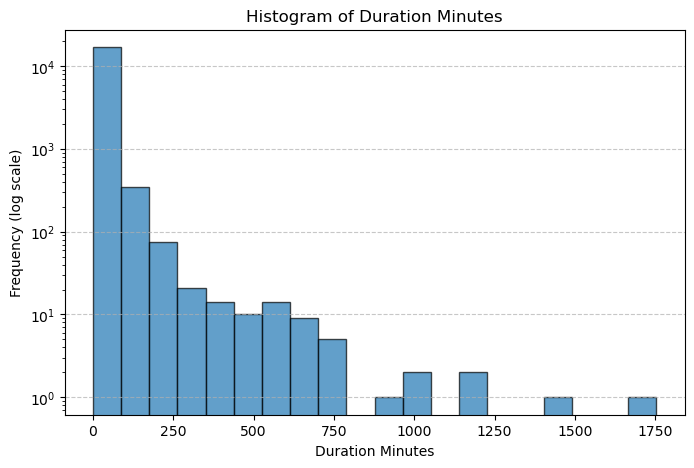

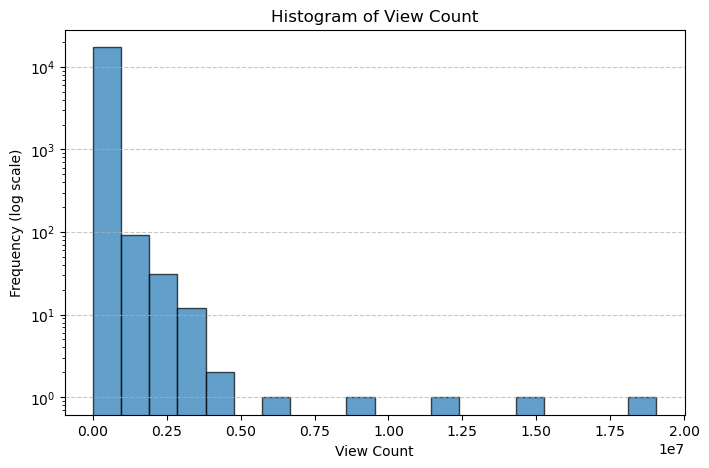

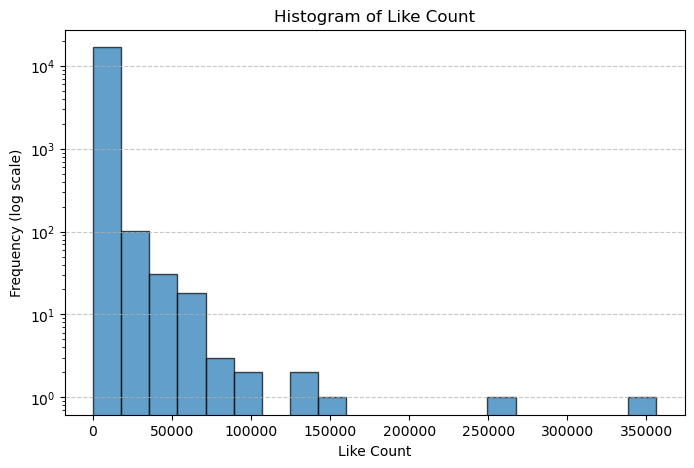

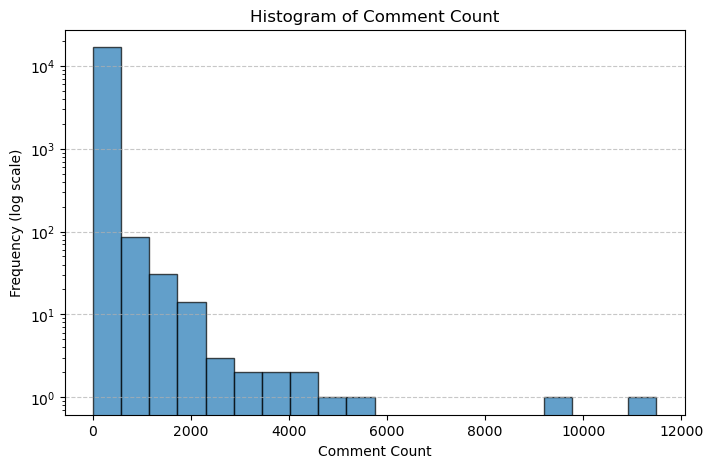

In [9]:
import matplotlib.pyplot as plt

# Define the columns for which we want to plot histograms
columns_to_plot = ['duration_minutes', 'view_count', 'like_count', 'comment_count']

# Create histograms for each of the selected columns
for col in columns_to_plot:
    plt.figure(figsize=(8, 5))
    plt.hist(merged_videos_df[col].dropna(), bins=20, edgecolor='black', alpha=0.7)
    # Apply logarithmic scale to the y-axis
    plt.yscale('log')

    # Labels and title
    plt.xlabel(col.replace('_', ' ').title())
    plt.ylabel('Frequency (log scale)')
    plt.title(f'Histogram of {col.replace("_", " ").title()}')

    # Grid for readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.show()


In [ ]:
# Review the descriptive statistics of the video channels
print(video_channels_df[['view_count', 'subscriber_count', 'video_count']].describe().round(2))

         view_count  subscriber_count  video_count
count  7.587000e+03           7587.00      7587.00
mean   8.914953e+06          65692.28      1118.51
std    1.265228e+08         738761.20     29937.28
min    2.000000e+00              0.00         1.00
25%    1.608400e+04            158.00        34.00
50%    1.277360e+05           1280.00       121.00
75%    1.006418e+06           8600.00       351.00
max    8.187923e+09       42200000.00   2035401.00


In [12]:
# standard deviation of channel view counts
std_dev = video_channels_df['view_count'].std()
print(f"Standard deviation of channel view counts: {std_dev:.2f}")

Standard deviation of channel view counts: 126522808.75


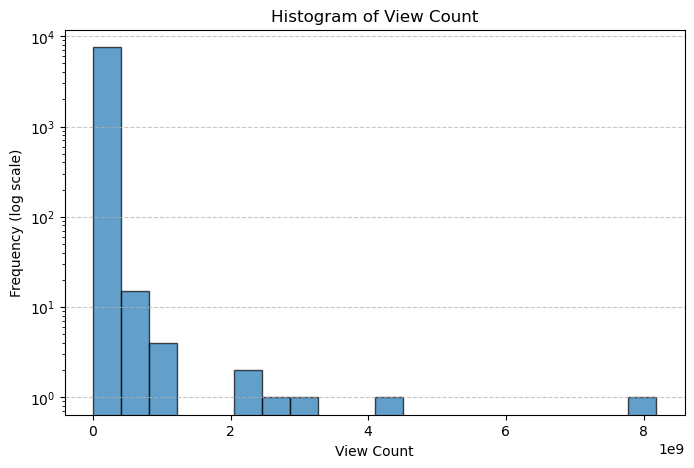

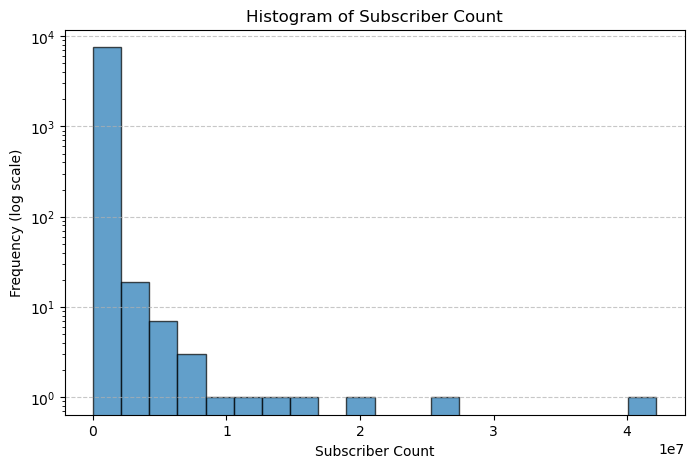

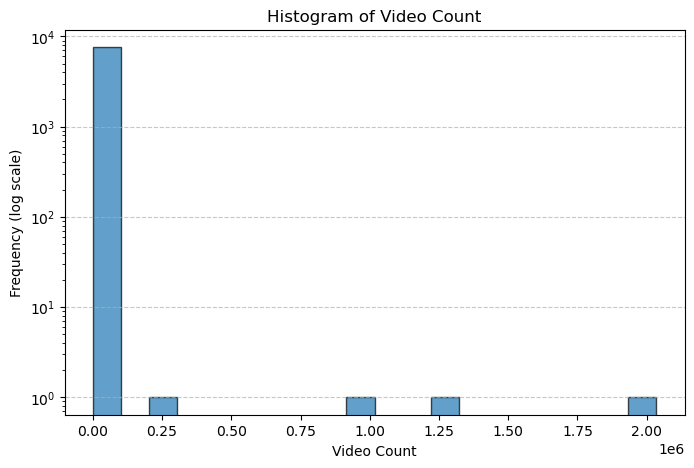

In [13]:
import matplotlib.pyplot as plt

# Define the columns for which we want to plot histograms
columns_to_plot = ['view_count', 'subscriber_count', 'video_count']

# Create histograms for each of the selected columns
for col in columns_to_plot:
    plt.figure(figsize=(8, 5))
    plt.hist(video_channels_df[col].dropna(), bins=20, edgecolor='black', alpha=0.7)
    # Apply logarithmic scale to the y-axis
    plt.yscale('log')

    # Labels and title
    plt.xlabel(col.replace('_', ' ').title())
    plt.ylabel('Frequency (log scale)')
    plt.title(f'Histogram of {col.replace("_", " ").title()}')

    # Grid for readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.show()


In [15]:
print(comment_threads_df[['top_level_like_count', 'total_reply_count']].describe().round(2))

       top_level_like_count  total_reply_count
count             373733.00          373733.00
mean                   2.88               0.43
std                   49.43               2.09
min                    0.00               0.00
25%                    0.00               0.00
50%                    0.00               0.00
75%                    1.00               1.00
max                 7839.00             353.00


### Comments

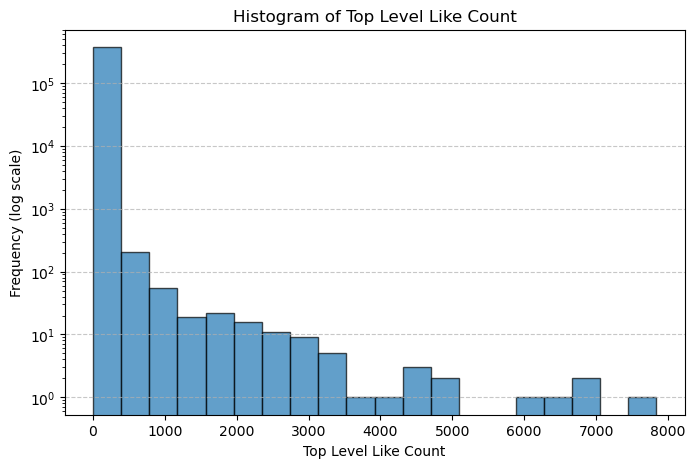

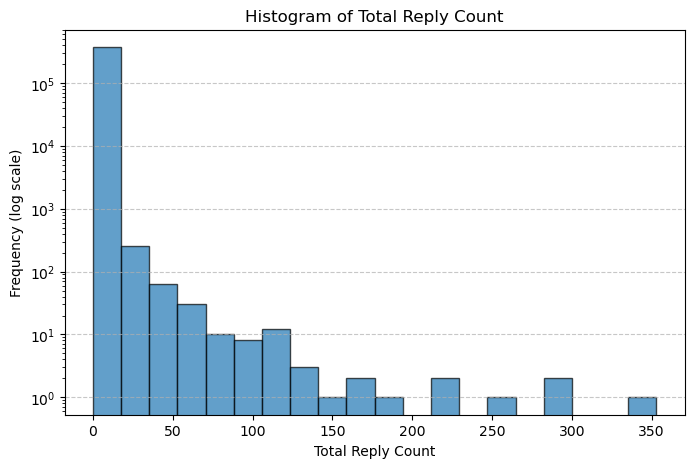

In [16]:
import matplotlib.pyplot as plt

# Define the columns for which we want to plot histograms
columns_to_plot = ['top_level_like_count', 'total_reply_count']

# Create histograms for each of the selected columns
for col in columns_to_plot:
    plt.figure(figsize=(8, 5))
    plt.hist(comment_threads_df[col].dropna(), bins=20, edgecolor='black', alpha=0.7)
    # Apply logarithmic scale to the y-axis
    plt.yscale('log')

    # Labels and title
    plt.xlabel(col.replace('_', ' ').title())
    plt.ylabel('Frequency (log scale)')
    plt.title(f'Histogram of {col.replace("_", " ").title()}')

    # Grid for readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.show()


In [18]:
print(replies_df[['reply_like_count']].describe().round(2))

       reply_like_count
count         138921.00
mean               0.83
std                6.96
min                0.00
25%                0.00
50%                0.00
75%                1.00
max              905.00


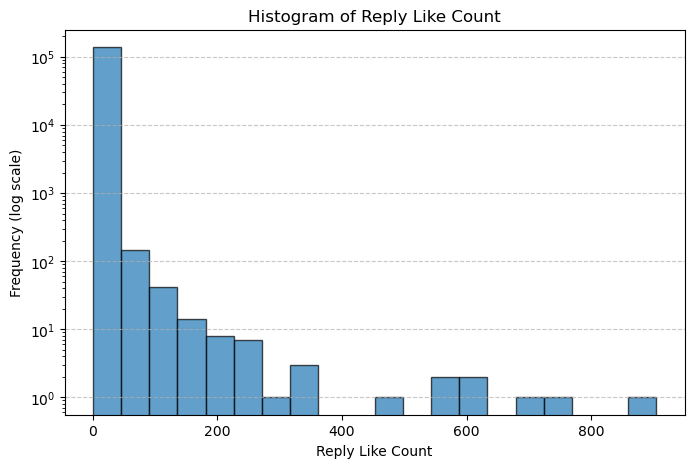

In [19]:
import matplotlib.pyplot as plt

# Define the columns for which we want to plot histograms
columns_to_plot = ['reply_like_count']

# Create histograms for each of the selected columns
for col in columns_to_plot:
    plt.figure(figsize=(8, 5))
    plt.hist(replies_df[col].dropna(), bins=20, edgecolor='black', alpha=0.7)
    # Apply logarithmic scale to the y-axis
    plt.yscale('log')

    # Labels and title
    plt.xlabel(col.replace('_', ' ').title())
    plt.ylabel('Frequency (log scale)')
    plt.title(f'Histogram of {col.replace("_", " ").title()}')

    # Grid for readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.show()


In [21]:
# Replace 'N/A' (or any similar placeholder) with actual NaN values
merged_videos_df.replace('N/A', pd.NA, inplace=True)

# Check for missing values
print(merged_videos_df.isnull().sum())

video_id                      0
title                         0
en_title                      0
channel_title                 0
published_at                  0
description                   0
en_description                0
tags                       5096
audio_language             7140
textual_language          13644
duration                      0
definition                    0
caption_availability          0
view_count                    1
like_count                  405
comment_count               486
paid_product_placement        0
keywords                      0
channel_id                    0
duration_minutes              0
dtype: int64


In [22]:
merged_videos_df['view_count'] = pd.to_numeric(
    merged_videos_df['view_count'], errors='coerce'
).fillna(0).astype(int)  # Ensure the column is integer

merged_videos_df['like_count'] = pd.to_numeric(
    merged_videos_df['like_count'], errors='coerce'
).fillna(0).astype(int)  # Ensure the column is integer

merged_videos_df['comment_count'] = pd.to_numeric(
    merged_videos_df['comment_count'], errors='coerce'
).fillna(0).astype(int)  # Ensure the column is integer

In [23]:
# Check for any remaining problematic rows
print(merged_videos_df['view_count'].isnull().sum())

print(merged_videos_df['like_count'].isnull().sum())

print(merged_videos_df['comment_count'].isnull().sum())

0
0
0


### Topic

In [24]:
# Topic-to-keywords mapping
topic_keywords_dict = {
    "relational theory": [
        "relational theory", "relational theory relations", 
        "relational theory tuples", "relational theory attributes"
    ],
    "tuple relational calculus": ["tuple relational calculus"],
    "relational algebra": ["relational algebra"],
    "data visualization": ["data visualization"],
    "database optimization": [
        "database optimization", "database optimization indexing", 
        "database optimization query execution plans", "database optimization query optimization"
    ],
    "database scalability": [
        "database scalability", "database scalability replication", 
        "database scalability sharding"
    ],
    "NoSQL database management systems": ["NoSQL database management systems"],
    "logical and physical data independence": [
        "data independence", "logical data independence", 
        "physical data independence", "logical and physical data independence"
    ],
    "database management system components": ["database management system components"],
    "functions and stored procedures": ["functions and stored procedures"],
    "data modeling": [
        "data modeling", "data modeling conceptual modeling", 
        "data modeling mapping conceptual models to logical models", 
        "data modeling creating tables and columns"
    ],
    "database normalization": [
        "database normalization", "database normalization functional dependency", 
        "database normalization candidate", "database normalization super keys", 
        "database normalization normal forms up to BCNF", 
        "database normalization multivalued dependency", 
        "database normalization join dependency"
    ],
    "object-oriented data models": ["object-oriented data models"],
    "semi-structured traditional data models": ["semi-structured traditional data models"],
    "SQL": [
        "SQL", "SQL select", "SQL project", "SQL join", 
        "SQL insert", "SQL update", "SQL delete", "SQL aggregation", 
        "SQL group by", "SQL subqueries", "SQL common table expressions"
    ],
    "transaction processing": ["transaction processing"],
    "concurrency control and isolation levels": [
        "concurrency control", "isolation levels", 
        "concurrency control and isolation levels"
    ],
    "database back-ups and recovery": [
        "database back-ups", "database recovery", 
        "database back-ups and recovery"
    ],
    "distributed database management systems": ["distributed database management systems"],
    "data mining": [
        "data mining", "data mining algorithms", "data mining associative pattern", 
        "data mining sequential pattern", "data mining associative and sequential patterns", 
        "data mining data cleaning", "data mining market basket analysis"
    ],
    "data privacy and ethics": [
        "data privacy", "data ethics", "data privacy and ethics"
    ],
    "data security and database access management": [
        "data security", "database access management", 
        "data security and database access management"
    ],
    "data warehousing": ["data warehousing"]
}

In [25]:
# Map videos to topics based on keywords
def map_video_to_topics(keywords, topic_keywords_dict):
    matched_topics = []
    for topic, topic_keywords in topic_keywords_dict.items():
        if any(keyword in keywords for keyword in topic_keywords):
            matched_topics.append(topic)
    return matched_topics

# Apply the mapping to the dataset
merged_videos_df['keywords_list'] = merged_videos_df['keywords'].str.split(',')  # Split keywords into lists
merged_videos_df['topics'] = merged_videos_df['keywords_list'].apply(
    lambda x: map_video_to_topics(x, topic_keywords_dict)
)

In [26]:
# Expand the dataset to one row per video-topic pair
expanded_df = merged_videos_df.explode('topics').dropna(subset=['topics'])

# Check the structure of the expanded dataset
print(expanded_df[['video_id', 'topics']].head())

      video_id                                 topics
0  4YilEjkNPrQ                      relational theory
0  4YilEjkNPrQ              tuple relational calculus
0  4YilEjkNPrQ                     relational algebra
0  4YilEjkNPrQ                  database optimization
0  4YilEjkNPrQ  database management system components


In [27]:
# Count videos per topic
topic_counts = expanded_df['topics'].value_counts().reset_index()
topic_counts.columns = ['topic', 'video_count']

# Display the top topics
print(topic_counts)

                                           topic  video_count
0                                            SQL         4915
1                         database normalization         1844
2                                    data mining         1752
3                          database optimization         1164
4                                  data modeling          979
5       concurrency control and isolation levels          777
6                 database back-ups and recovery          697
7         logical and physical data independence          576
8                               data warehousing          504
9                functions and stored procedures          500
10                            relational algebra          491
11                          database scalability          477
12                            data visualization          467
13             NoSQL database management systems          453
14                     tuple relational calculus          405
15      

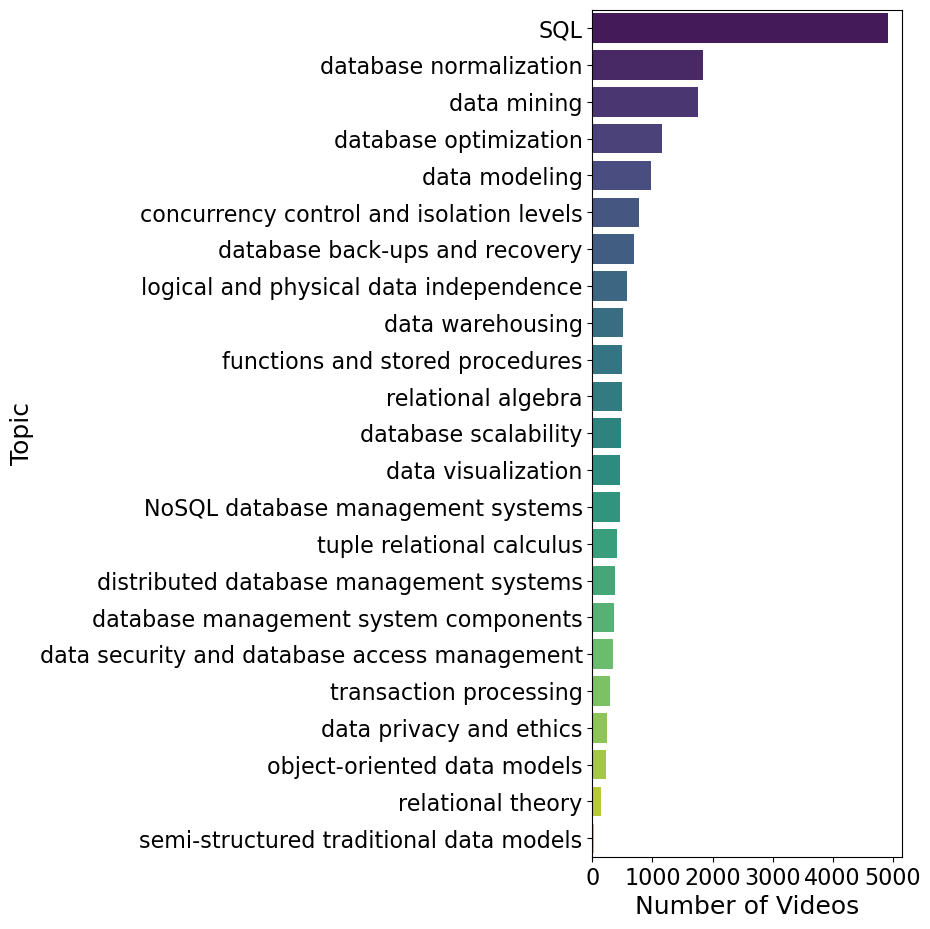

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart of videos per topic
plt.figure(figsize=(4, 11))
sns.barplot(x='video_count', y='topic', data=topic_counts, palette='viridis')
plt.xlabel('Number of Videos', fontsize=18)
plt.ylabel('Topic', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig("video_topic.png", dpi=100, bbox_inches='tight', pad_inches=0)
plt.show()

In [29]:
# Calculate the median view count for each topic
median_view_count_per_topic = expanded_df.groupby('topics')['view_count'].median().reset_index()

# Rename columns for clarity
median_view_count_per_topic.columns = ['topic', 'median_view_count']

# Display the result
print(median_view_count_per_topic)

                                           topic  median_view_count
0              NoSQL database management systems              512.0
1                                            SQL             3106.0
2       concurrency control and isolation levels             1312.0
3                                    data mining             2377.5
4                                  data modeling             5382.0
5                        data privacy and ethics              507.5
6   data security and database access management            12716.0
7                             data visualization            10212.0
8                               data warehousing             2420.5
9                 database back-ups and recovery             4150.0
10         database management system components             2269.0
11                        database normalization             1153.5
12                         database optimization              883.5
13                          database scalability

In [30]:
# Calculate the median view count for each topic
median_like_count_per_topic = expanded_df.groupby('topics')['like_count'].median().reset_index()

# Rename columns for clarity
median_like_count_per_topic.columns = ['topic', 'median_like_count']

# Display the result
print(median_like_count_per_topic)

                                           topic  median_like_count
0              NoSQL database management systems               12.0
1                                            SQL               51.0
2       concurrency control and isolation levels               25.0
3                                    data mining               28.0
4                                  data modeling               63.0
5                        data privacy and ethics                5.5
6   data security and database access management              124.0
7                             data visualization              175.0
8                               data warehousing               47.5
9                 database back-ups and recovery               36.0
10         database management system components               38.0
11                        database normalization               25.0
12                         database optimization               14.0
13                          database scalability

In [138]:
# Calculate the median view count for each topic
median_like_count_per_topic = expanded_df.groupby('topics')['comment_count'].median().reset_index()

# Rename columns for clarity
median_like_count_per_topic.columns = ['topic', 'median_comment_count']

# Display the result
print(median_like_count_per_topic)

                                           topic  median_comment_count
0              NoSQL database management systems                   1.0
1                                            SQL                   3.0
2       concurrency control and isolation levels                   1.0
3                                    data mining                   2.0
4                                  data modeling                   4.0
5                        data privacy and ethics                   0.0
6   data security and database access management                   8.0
7                             data visualization                   5.0
8                               data warehousing                   3.0
9                 database back-ups and recovery                   2.0
10         database management system components                   4.0
11                        database normalization                   2.0
12                         database optimization                   1.0
13    

In [31]:
# Calculate the median duration for each topic
median_duration_per_topic = expanded_df.groupby('topics')['duration_minutes'].median().reset_index()

# Rename columns for clarity
median_duration_per_topic.columns = ['topic', 'median_duration_minutes']

# Round the median duration to 2 decimal places
median_duration_per_topic['median_duration_minutes'] = median_duration_per_topic['median_duration_minutes'].round(2)

# Display the result
print(median_duration_per_topic)

                                           topic  median_duration_minutes
0              NoSQL database management systems                     6.20
1                                            SQL                     8.10
2       concurrency control and isolation levels                    13.90
3                                    data mining                     9.75
4                                  data modeling                    13.68
5                        data privacy and ethics                    11.30
6   data security and database access management                    11.57
7                             data visualization                    12.33
8                               data warehousing                     8.88
9                 database back-ups and recovery                    10.45
10         database management system components                     8.82
11                        database normalization                    11.38
12                         database op

In [ ]:
import pandas as pd

# Number of videos
topic_counts = expanded_df['topics'].value_counts().reset_index()
topic_counts.columns = ['topic', 'video_count']

# Median view count
median_view_count_per_topic = expanded_df.groupby('topics')['view_count'].median().reset_index()
median_view_count_per_topic.columns = ['topic', 'median_view_count']

# Median like count
median_like_count_per_topic = expanded_df.groupby('topics')['like_count'].median().reset_index()
median_like_count_per_topic.columns = ['topic', 'median_like_count']

# Median comment count
median_comment_count_per_topic = expanded_df.groupby('topics')['comment_count'].median().reset_index()
median_comment_count_per_topic.columns = ['topic', 'median_comment_count']

# Median duration (minutes)
median_duration_per_topic = expanded_df.groupby('topics')['duration_minutes'].median().reset_index()
median_duration_per_topic.columns = ['topic', 'median_duration_minutes']
median_duration_per_topic['median_duration_minutes'] = median_duration_per_topic['median_duration_minutes'].round(2)

# Merge all statistics
merged_df = topic_counts \
    .merge(median_view_count_per_topic, on='topic') \
    .merge(median_like_count_per_topic, on='topic') \
    .merge(median_comment_count_per_topic, on='topic') \
    .merge(median_duration_per_topic, on='topic')

# Sort by number of videos (optional)
merged_df = merged_df.sort_values(by='video_count', ascending=False)

# Display the merged table
print(merged_df)


                                           topic  video_count  \
0                                            SQL         4915   
1                         database normalization         1844   
2                                    data mining         1752   
3                          database optimization         1164   
4                                  data modeling          979   
5       concurrency control and isolation levels          777   
6                 database back-ups and recovery          697   
7         logical and physical data independence          576   
8                               data warehousing          504   
9                functions and stored procedures          500   
10                            relational algebra          491   
11                          database scalability          477   
12                            data visualization          467   
13             NoSQL database management systems          453   
14                     tu

   number_of_topics  video_count
0                 1        16956
1                 2          405
2                 3           57
3                 4           12
4                 6            2
5                 7            1
6                 5            1


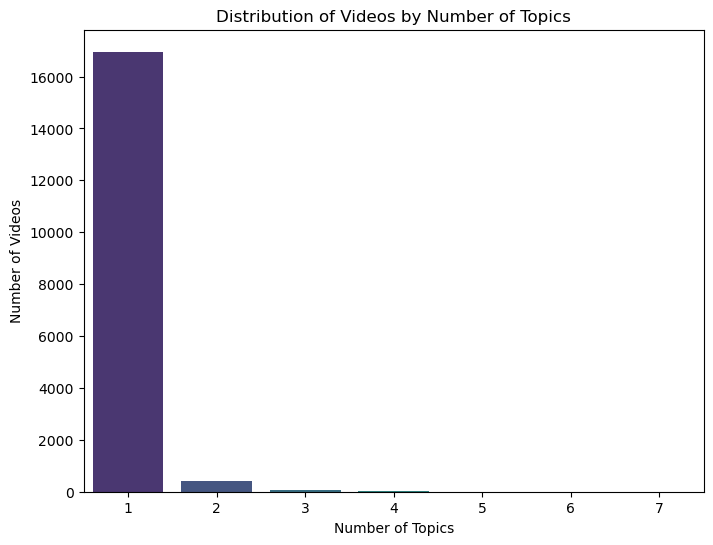

In [32]:
# Count the number of topics per video
merged_videos_df['topic_count'] = merged_videos_df['topics'].apply(len)

# Distribution of videos by number of topics
topic_overlap_distribution = merged_videos_df['topic_count'].value_counts().reset_index()
topic_overlap_distribution.columns = ['number_of_topics', 'video_count']

# Display overlap distribution
print(topic_overlap_distribution)

# Visualize overlap
plt.figure(figsize=(8, 6))
sns.barplot(x='number_of_topics', y='video_count', data=topic_overlap_distribution, palette='viridis')
plt.title('Distribution of Videos by Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Number of Videos')
plt.show()

   number_of_topics  video_count
0                 1        16956
1                 2          405
2                 3           57
3                 4           12
4                 6            2
5                 7            1
6                 5            1


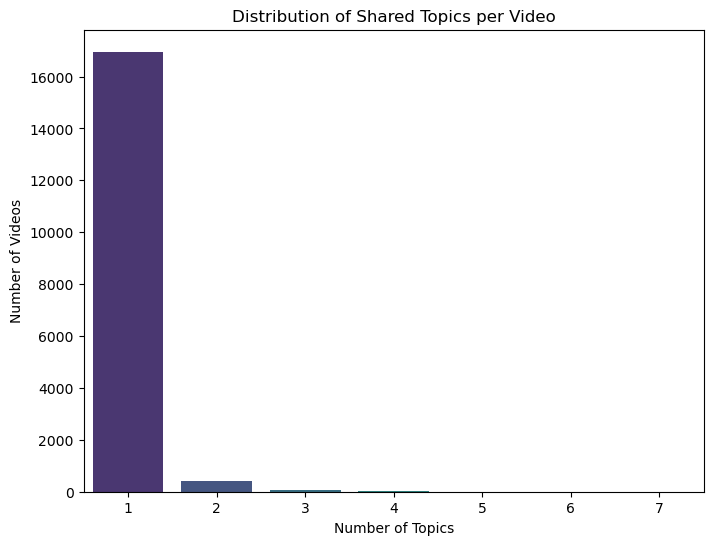

In [33]:
# Count the number of topics for each video
merged_videos_df['topic_count'] = merged_videos_df['topics'].apply(len)

# Distribution of topic counts
topic_overlap_distribution = merged_videos_df['topic_count'].value_counts().reset_index()
topic_overlap_distribution.columns = ['number_of_topics', 'video_count']

# Display the distribution
print(topic_overlap_distribution)

# Visualize the distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x='number_of_topics', y='video_count', data=topic_overlap_distribution, palette='viridis')
plt.title('Distribution of Shared Topics per Video')
plt.xlabel('Number of Topics')
plt.ylabel('Number of Videos')
plt.show()

In [34]:
from itertools import combinations

# Get combinations of topics for videos with multiple topics
def get_topic_combinations(topics):
    if len(topics) > 1:
        return list(combinations(sorted(topics), 2))  # Generate pairs of topics
    return []

# Apply to dataset
merged_videos_df['topic_combinations'] = merged_videos_df['topics'].apply(get_topic_combinations)

# Expand combinations into rows
combination_df = merged_videos_df.explode('topic_combinations').dropna(subset=['topic_combinations'])

# Count occurrences of each combination
combination_counts = combination_df['topic_combinations'].value_counts().reset_index()
combination_counts.columns = ['topic_combination', 'count']

# Display top combinations
print(combination_counts)

                                     topic_combination  count
0         (data modeling, object-oriented data models)     48
1                      (data mining, data warehousing)     37
2      (relational algebra, tuple relational calculus)     29
3       (relational theory, tuple relational calculus)     23
4    (NoSQL database management systems, distribute...     20
..                                                 ...    ...
120  (concurrency control and isolation levels, dat...      1
121  (database management system components, tuple ...      1
122  (data security and database access management,...      1
123  (NoSQL database management systems, semi-struc...      1
124                (data mining, database scalability)      1

[125 rows x 2 columns]


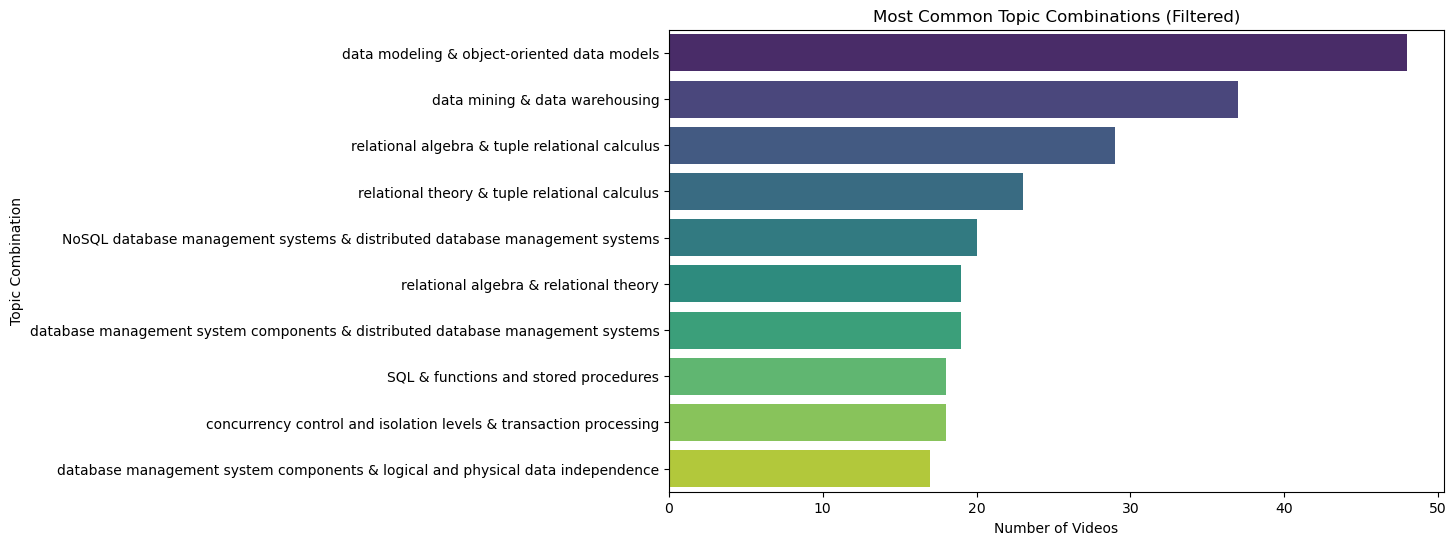

In [35]:
# Display filtered combinations (e.g., top 10 by count)
top_combinations = combination_counts.head(10)

import matplotlib.pyplot as plt
import seaborn as sns

# Visualize filtered combinations
plt.figure(figsize=(10, 6))
sns.barplot(
    x='count', 
    y=top_combinations['topic_combination'].apply(lambda x: ' & '.join(x)), 
    data=top_combinations, 
    palette='viridis'
)
plt.title('Most Common Topic Combinations (Filtered)')
plt.xlabel('Number of Videos')
plt.ylabel('Topic Combination')
plt.show()


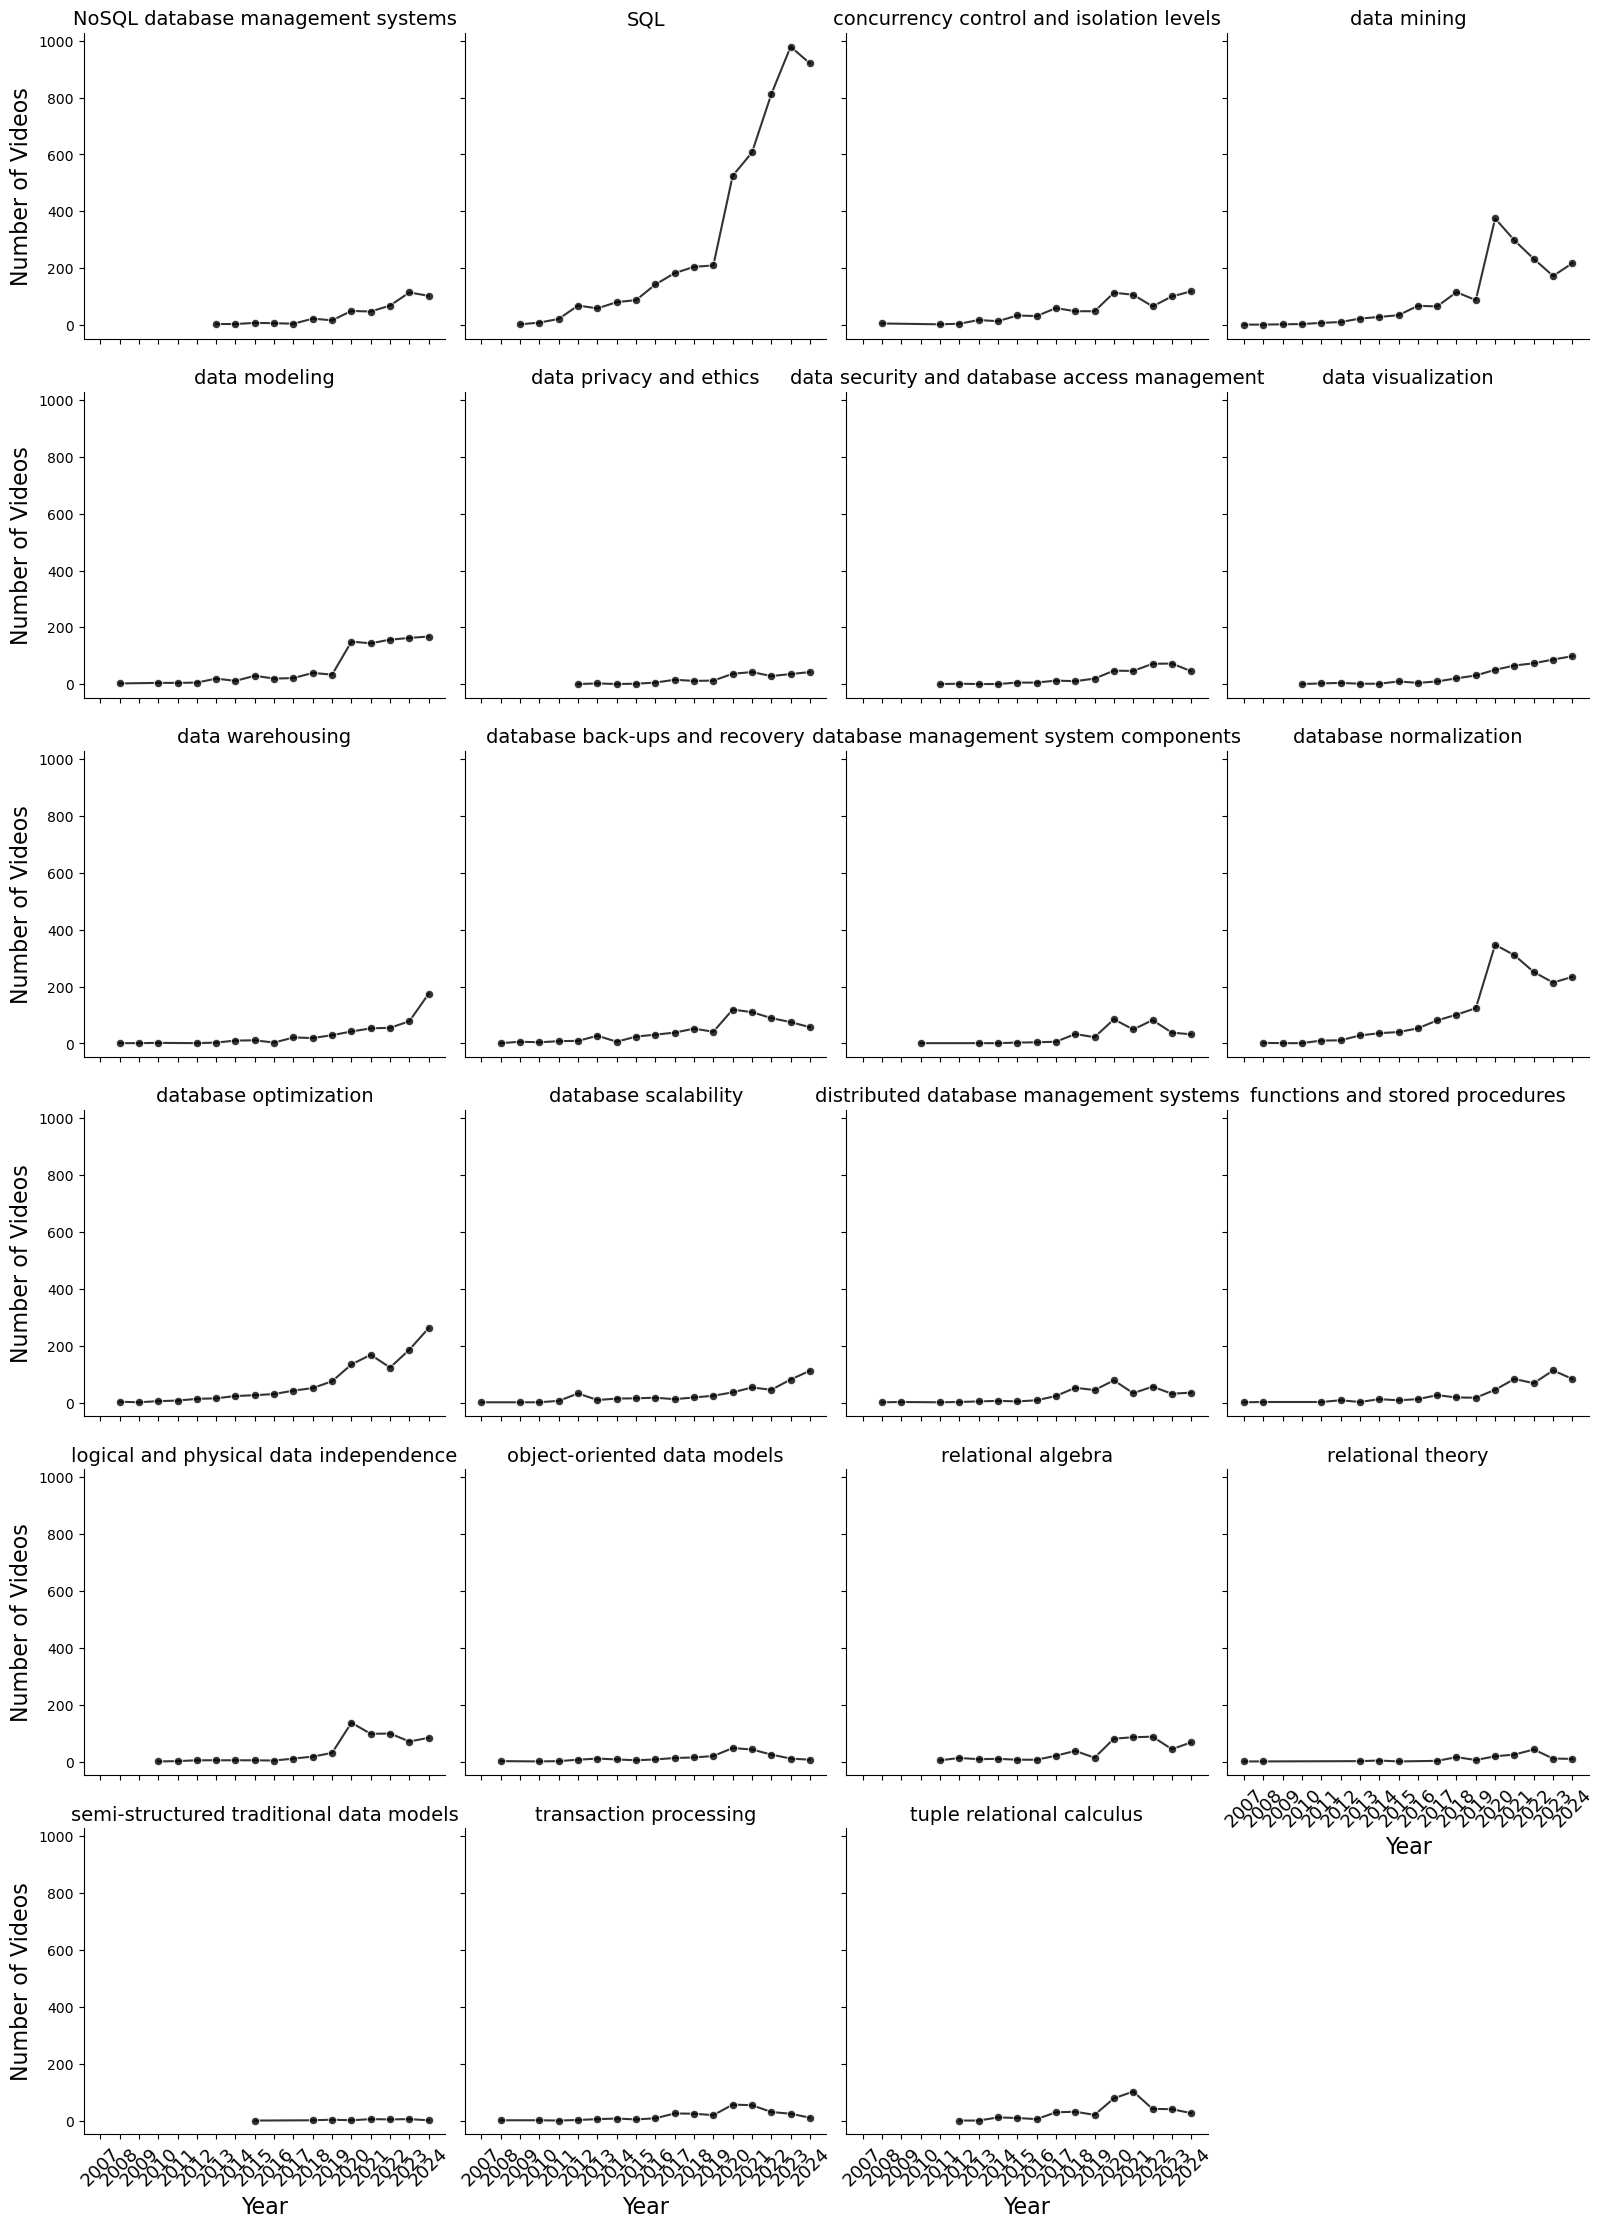

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract year from published_at
expanded_df['year'] = pd.to_datetime(expanded_df['published_at']).dt.year

# Group by topic and year
topic_trends = expanded_df.groupby(['topics', 'year']).size().reset_index(name='video_count')

# FacetGrid plot with unified y-axis, line color set to black
g = sns.FacetGrid(topic_trends, col="topics", col_wrap=4, height=4, sharey=True, sharex=True)
g.map(sns.lineplot, "year", "video_count", marker="o", alpha=0.8, color="black")

# Set integer ticks for the x-axis
for ax in g.axes.flat:
    ax.set_xticks(range(int(topic_trends['year'].min()), int(topic_trends['year'].max()) + 1))
    ax.set_xticklabels(range(int(topic_trends['year'].min()), int(topic_trends['year'].max()) + 1), rotation=45, fontsize=13)
    ax.set_xlabel("Year", fontsize=16)
    ax.set_ylabel("Number of Videos", fontsize=16)
    ax.title.set_fontsize(14)

g.set_titles("{col_name}", size=14)
g.fig.subplots_adjust(top=0.9)
plt.show()

### Video View Count

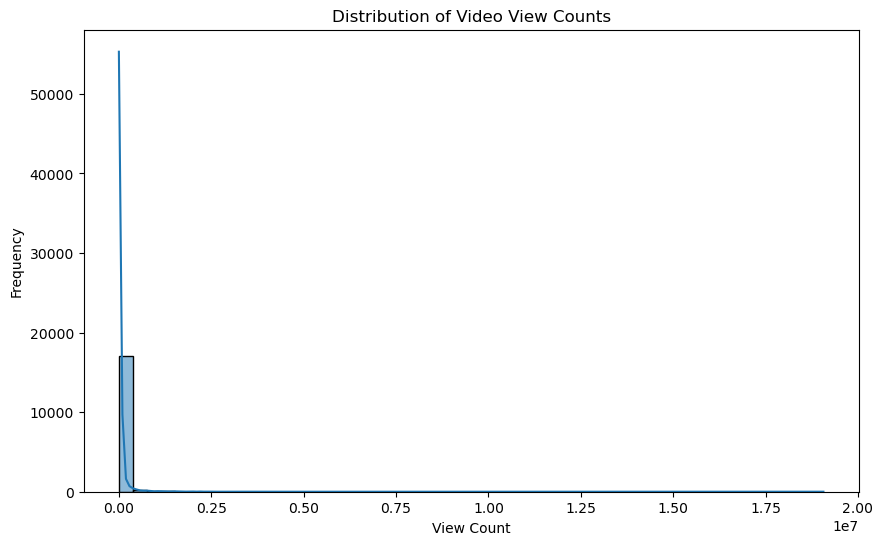

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of video view counts
plt.figure(figsize=(10, 6))
sns.histplot(merged_videos_df['view_count'], bins=50, kde=True)
plt.title('Distribution of Video View Counts')
plt.xlabel('View Count')
plt.ylabel('Frequency')
plt.show()

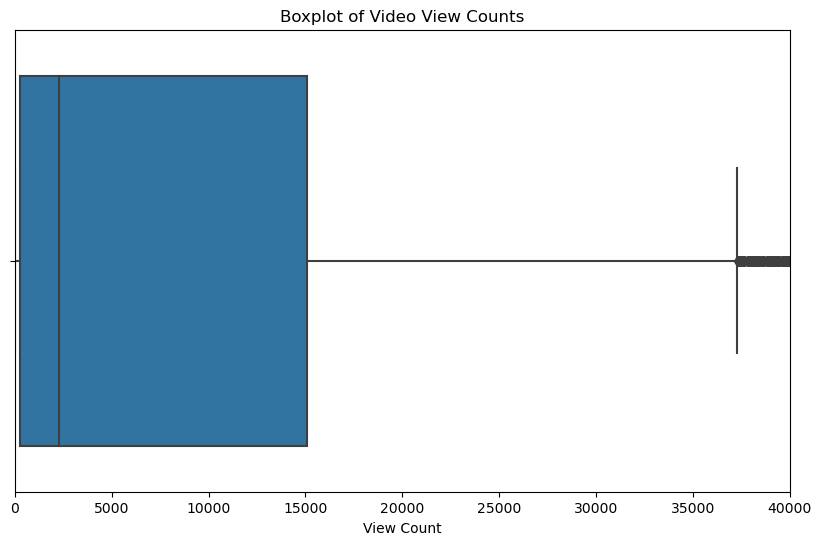

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the boxplot of video view counts with a set range
plt.figure(figsize=(10, 6))
sns.boxplot(x=merged_videos_df['view_count'])

# Set x-axis range
plt.xlim(0, 40000)  # Adjust this range as needed

plt.title('Boxplot of Video View Counts')
plt.xlabel('View Count')
plt.show()


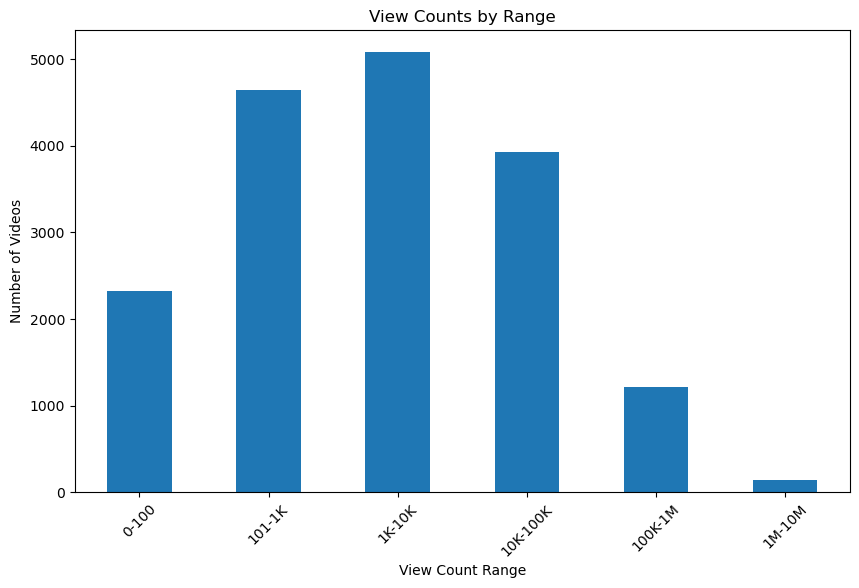

In [40]:
# Create a new column for the view count bins
merged_videos_df['view_count_bins'] = pd.cut(merged_videos_df['view_count'], 
                                             bins=[0, 100, 1000, 10000, 100000, 1000000, 10000000],
                                             labels=['0-100', '101-1K', '1K-10K', '10K-100K', '100K-1M', '1M-10M'])

# Count the number of videos in each bin
bin_counts = merged_videos_df['view_count_bins'].value_counts().sort_index()

# Plot the distribution of view counts by range
plt.figure(figsize=(10, 6))
bin_counts.plot(kind='bar')
plt.title('View Counts by Range')
plt.xlabel('View Count Range')
plt.ylabel('Number of Videos')
plt.xticks(rotation=45)
plt.show()

### Video Publication

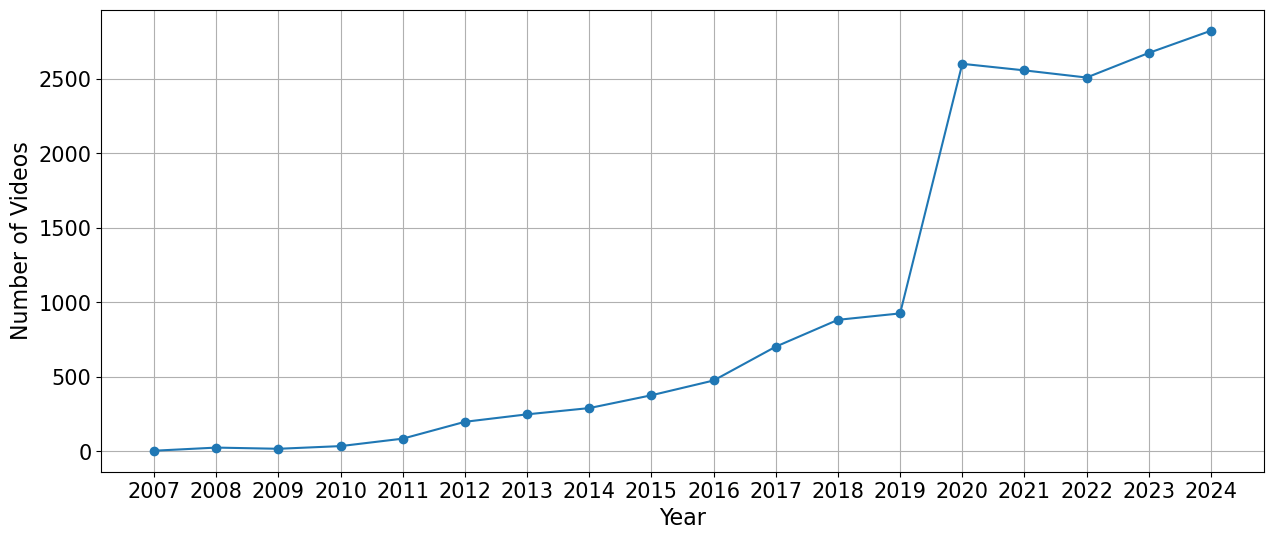

In [41]:
# Convert the 'published_at' column to datetime
merged_videos_df['published_at'] = pd.to_datetime(merged_videos_df['published_at'])
# Convert publish_year to integers
merged_videos_df['publish_year'] = merged_videos_df['published_at'].dt.year.astype(int)

# Group by year
video_per_year = merged_videos_df.groupby('publish_year').size()

# Plot
plt.figure(figsize=(15, 6))
video_per_year.plot(kind='line', marker='o')
# plt.title('Videos Publication Year Distribution')
plt.xlabel('Year', fontsize=16)
plt.ylabel('Number of Videos', fontsize=16)
plt.xticks(video_per_year.index, fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.show()

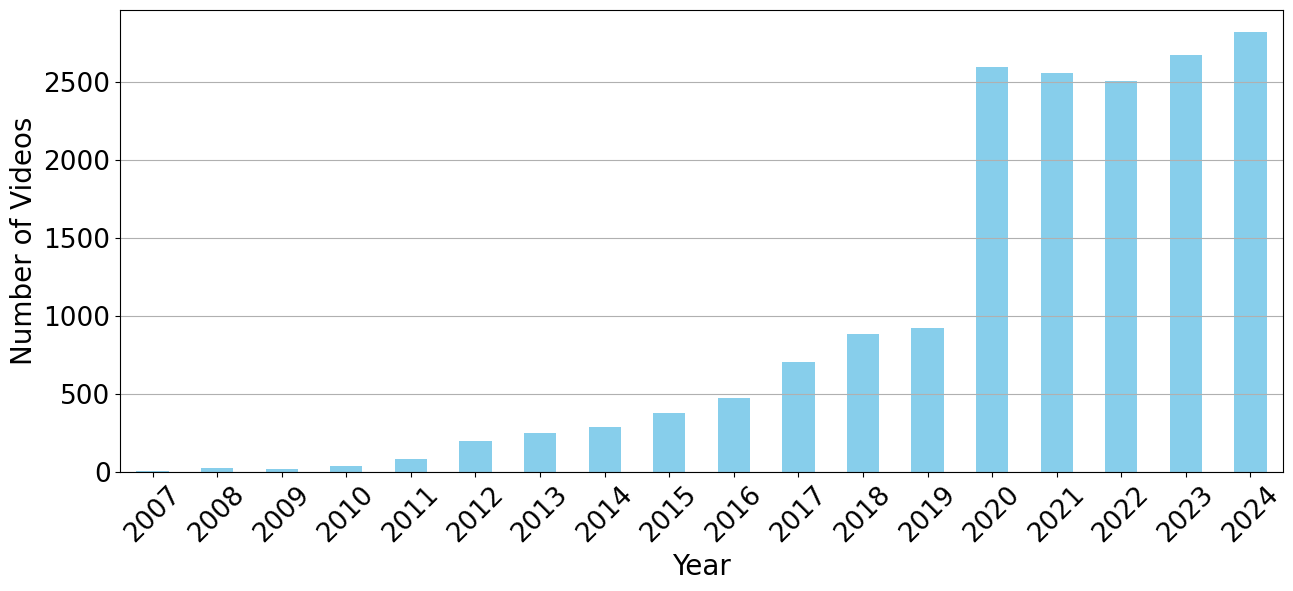

In [4]:
# Convert the 'published_at' column to datetime
merged_videos_df['published_at'] = pd.to_datetime(merged_videos_df['published_at'])
# Convert publish_year to integers
merged_videos_df['publish_year'] = merged_videos_df['published_at'].dt.year.astype(int)

# Group by year
video_per_year = merged_videos_df.groupby('publish_year').size()

# Plot
plt.figure(figsize=(15, 6))
video_per_year.plot(kind='bar', color='skyblue')
plt.xlabel('Year', fontsize=20)
plt.ylabel('Number of Videos', fontsize=20)
plt.xticks(rotation=45, fontsize=19)
plt.yticks(fontsize=19)
plt.grid(axis='y')
plt.show()


In [5]:
# Convert the 'published_at' column in video_channels_df to datetime
video_channels_df['published_at'] = pd.to_datetime(video_channels_df['published_at'])
# Extract the year of channel creation
video_channels_df['creation_year'] = video_channels_df['published_at'].dt.year

# Group by creation year
channels_per_year = video_channels_df.groupby('creation_year').size().reset_index(name='count')['count']

In [6]:
print(channels_per_year)

0        8
1      102
2      111
3      127
4      189
5      203
6      526
7      443
8      456
9      423
10     407
11     414
12     477
13     400
14     439
15    1156
16     576
17     419
18     438
19     273
Name: count, dtype: int64


In [7]:
# Add data for 2005 and 2006
video_per_year = pd.concat([video_per_year, pd.Series([0, 0], index=[2005, 2006])]).sort_index()

# Print the updated series
print(video_per_year)

2005       0
2006       0
2007       5
2008      26
2009      18
2010      36
2011      86
2012     199
2013     249
2014     291
2015     377
2016     476
2017     703
2018     883
2019     926
2020    2600
2021    2556
2022    2508
2023    2673
2024    2822
dtype: int64


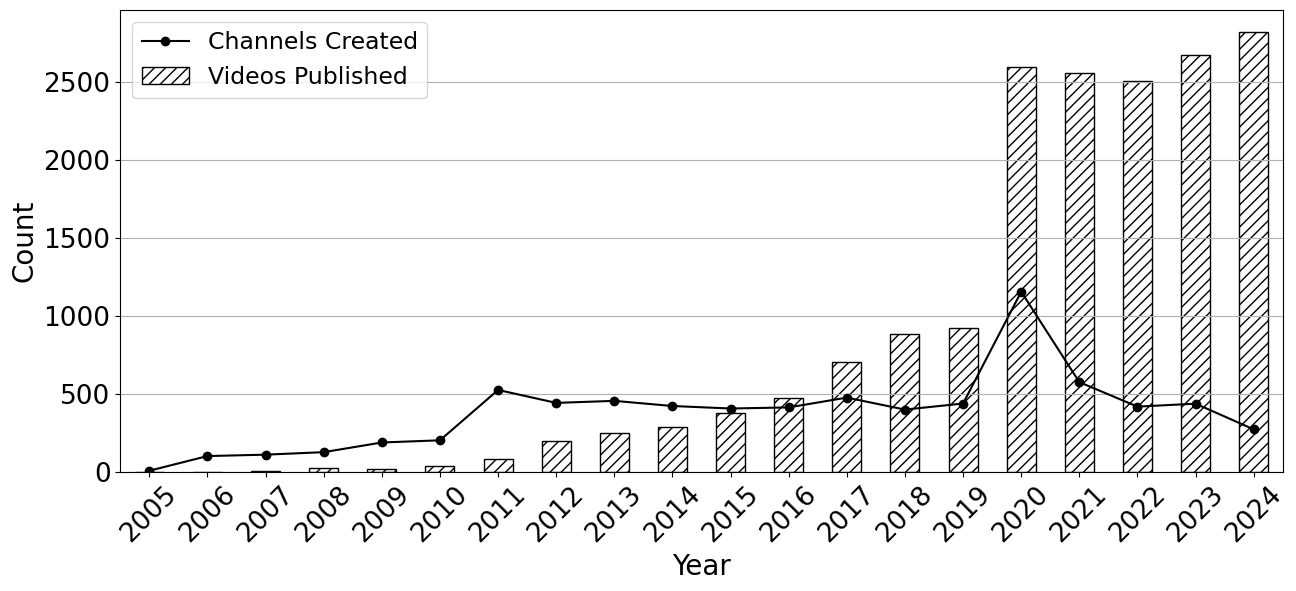

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 6)) 

# Bar plot
video_per_year.plot(
    kind='bar',
    color='white',
    edgecolor='black',
    hatch='///',
    ax=ax,
    label='Videos Published'
)

# Line plot
channels_per_year.plot(
    kind='line',
    color='black',
    marker='o',
    ax=ax,
    label='Channels Created'
)

# Labels and titles
ax.set_xlabel('Year', fontsize=20)
ax.set_ylabel('Count', fontsize=20)

ax.tick_params(axis='x', rotation=45, labelsize=19)
ax.tick_params(axis='y', labelsize=19)

ax.grid(axis='y')

# Legend
ax.legend(loc='upper left', fontsize=17)

plt.show()


In [64]:
# Calculate the yearly increase rate for videos
video_per_year_diff = video_per_year.diff().fillna(0)
video_per_year_rate = (video_per_year_diff / video_per_year.shift(1)).fillna(0) * 100

# Calculate the yearly increase rate for channels
channels_per_year_diff = channels_per_year.diff().fillna(0)
channels_per_year_rate = (channels_per_year_diff / channels_per_year.shift(1)).fillna(0) * 100

# Combine the results into a DataFrame for better visualization
increase_rate_df = pd.DataFrame({
    'Year': video_per_year.index,
    'Video Increase Rate (%)': video_per_year_rate.values,
    'Channel Increase Rate (%)': channels_per_year_rate.values
})

print(increase_rate_df)

    Year  Video Increase Rate (%)  Channel Increase Rate (%)
0   2005                 0.000000                   0.000000
1   2006                 0.000000                1175.000000
2   2007                      inf                   8.823529
3   2008               420.000000                  14.414414
4   2009               -30.769231                  48.818898
5   2010               100.000000                   7.407407
6   2011               138.888889                 159.113300
7   2012               131.395349                 -15.779468
8   2013                25.125628                   2.934537
9   2014                16.867470                  -7.236842
10  2015                29.553265                  -3.782506
11  2016                26.259947                   1.719902
12  2017                47.689076                  15.217391
13  2018                25.604552                 -16.142558
14  2019                 4.869762                   9.750000
15  2020               1

In [65]:
median_view_count_per_year = merged_videos_df.groupby('publish_year')['view_count'].median().reset_index()

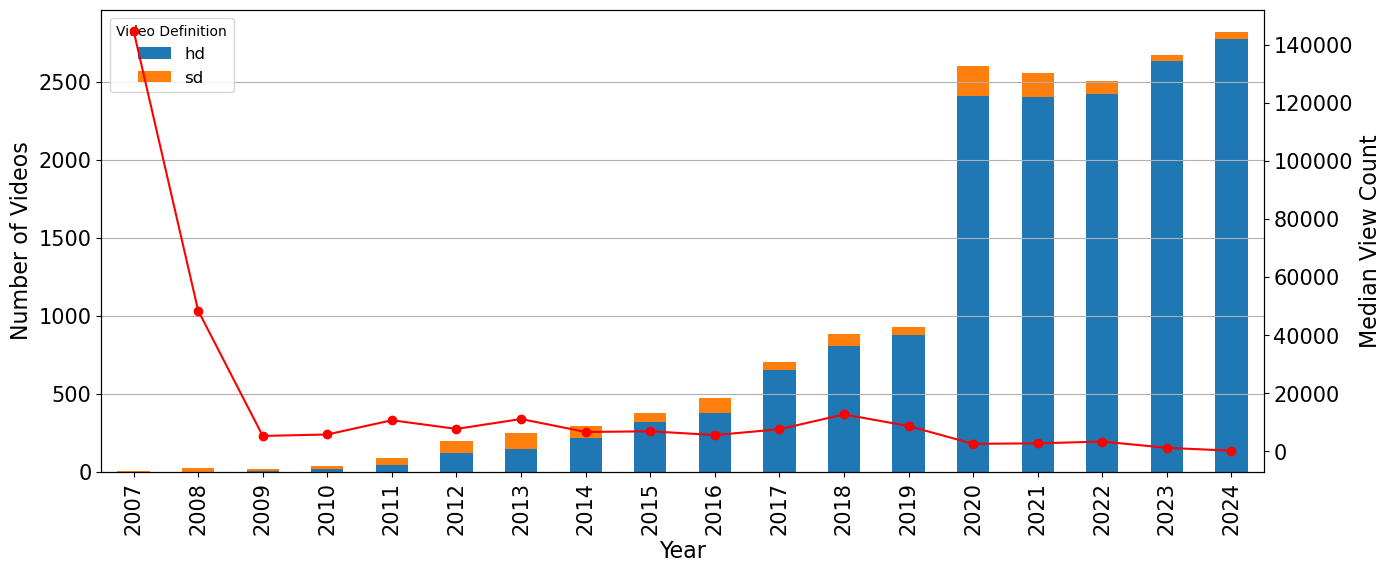

In [66]:
# Group by year and definition
definition_per_year = merged_videos_df.groupby(['publish_year', 'definition']).size().unstack().fillna(0)

# Plot
fig, ax1 = plt.subplots(figsize=(15, 6))

definition_per_year.plot(kind='bar', stacked=True, ax=ax1)
ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('Number of Videos', fontsize=16)
ax1.tick_params(axis='x', labelsize=15)
ax1.tick_params(axis='y', labelsize=15)
ax1.legend(title='Video Definition', fontsize=12)
ax1.grid(axis='y')

# Add a secondary y-axis for the median view count
ax2 = ax1.twinx()
median_view_count_per_year['view_count'].plot(kind='line', color='red', marker='o', ax=ax2)
ax2.set_ylabel('Median View Count', fontsize=16)
ax2.tick_params(axis='y', labelsize=15)

plt.show()


### Audio/Textual Language

In [67]:
import json
import pandas as pd

# load language data
with open('I18nLanguages.json', 'r', encoding='utf-8') as file:
    language_data = json.load(file)

# create a mapping dictionary
language_mapping = {item['id']: item['snippet']['name'] for item in language_data['items']}

print(list(language_mapping.items())[:10])

[('en-US', 'English (United States)'), ('af', 'Afrikaans'), ('am', 'Amharic'), ('ar', 'Arabic'), ('as', 'Assamese'), ('az', 'Azerbaijani'), ('be', 'Belarusian'), ('bg', 'Bulgarian'), ('bn', 'Bangla'), ('bs', 'Bosnian')]


#### Audio Language

In [ ]:
# Replace 'N/A' with 'Not Specified'
merged_videos_df['audio_language'] = merged_videos_df['audio_language'].fillna('Not Specified')

# Use the language mapping dictionary to replace existing audio_language values
merged_videos_df['audio_language'] = merged_videos_df['audio_language'].map(language_mapping).fillna(merged_videos_df['audio_language'])

# Calculate the language distribution after conversion
audio_language_dist = merged_videos_df['audio_language'].value_counts()


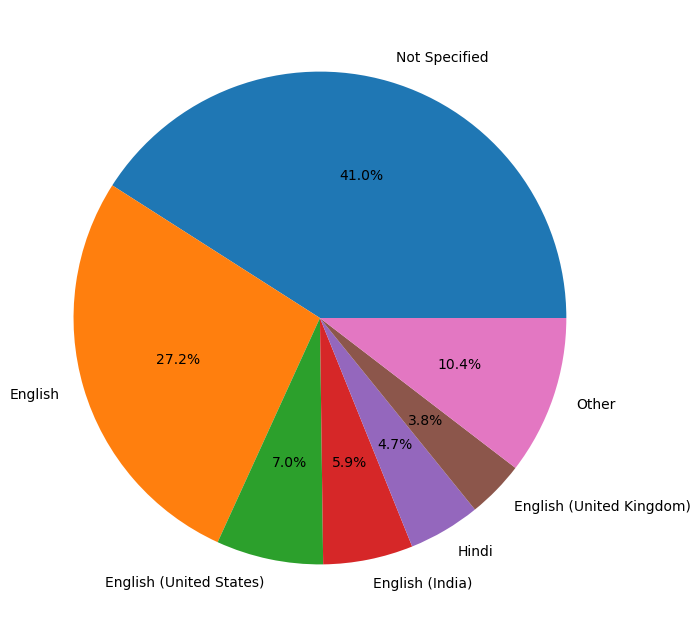

In [ ]:
# map the language codes to full names
audio_language_dist_fullnames = audio_language_dist.rename(index=language_mapping)

# Get the top 5 languages, group others as "Other"
top_languages = audio_language_dist_fullnames.nlargest(6) 
audio_language_dist_fullnames['Other'] = audio_language_dist_fullnames[~audio_language_dist_fullnames.index.isin(top_languages.index)].sum()
filtered_audio_language_dist = audio_language_dist_fullnames[top_languages.index.tolist() + ['Other']]

# Plot the updated pie chart
filtered_audio_language_dist.plot(
    kind='pie', autopct='%1.1f%%', figsize=(8, 8), labels=filtered_audio_language_dist.index
)
plt.ylabel('')
plt.show()



In [ ]:
import pandas as pd

# Preprocessing
merged_videos_df['audio_language'] = merged_videos_df['audio_language'].fillna('Not Specified')
merged_videos_df['audio_language'] = merged_videos_df['audio_language'].map(language_mapping).fillna(merged_videos_df['audio_language'])

# Get language frequency
language_counts = merged_videos_df['audio_language'].value_counts()

# Top 10 languages
top_10_languages = language_counts.nlargest(11).index.tolist()

# Total sample count
total_count = len(merged_videos_df)

# List to store statistics
results = []

# Statistics for Top 10 languages
for lang in top_10_languages:
    lang_df = merged_videos_df[merged_videos_df['audio_language'] == lang]
    count = len(lang_df)
    percentage = round(count / total_count * 100, 2)
    results.append({
        'language': lang,
        'count': count,
        'percentage': percentage,
        'view_count_median': lang_df['view_count'].median(),
        'comment_count_median': lang_df['comment_count'].median(),
        'like_count_median': lang_df['like_count'].median()
    })

# Statistics for Other languages
other_df = merged_videos_df[~merged_videos_df['audio_language'].isin(top_10_languages)]
other_count = len(other_df)
other_percentage = round(other_count / total_count * 100, 2)
results.append({
    'language': 'Other',
    'count': other_count,
    'percentage': other_percentage,
    'view_count_median': other_df['view_count'].median(),
    'comment_count_median': other_df['comment_count'].median(),
    'like_count_median': other_df['like_count'].median()
})

# Convert to DataFrame to view results
final_stats_df = pd.DataFrame(results)
final_stats_df = final_stats_df.sort_values(by='count', ascending=False)


In [118]:
print(final_stats_df)

                    language  count  percentage  view_count_median  \
0              Not Specified   7140       40.95             1199.0   
1                    English   4748       27.23             3714.0   
2    English (United States)   1224        7.02             1753.0   
11                     Other   1087        6.23             3743.0   
3            English (India)   1028        5.90             1951.5   
4                      Hindi    823        4.72             3892.0   
5   English (United Kingdom)    656        3.76             3959.0   
6                     Arabic    182        1.04             5976.5   
7                     Telugu    169        0.97             6262.0   
8                       Urdu    146        0.84              959.5   
9                      Tamil    126        0.72             4839.5   
10                Indonesian    105        0.60             2083.0   

    comment_count_median  like_count_median  
0                    1.0               17.0

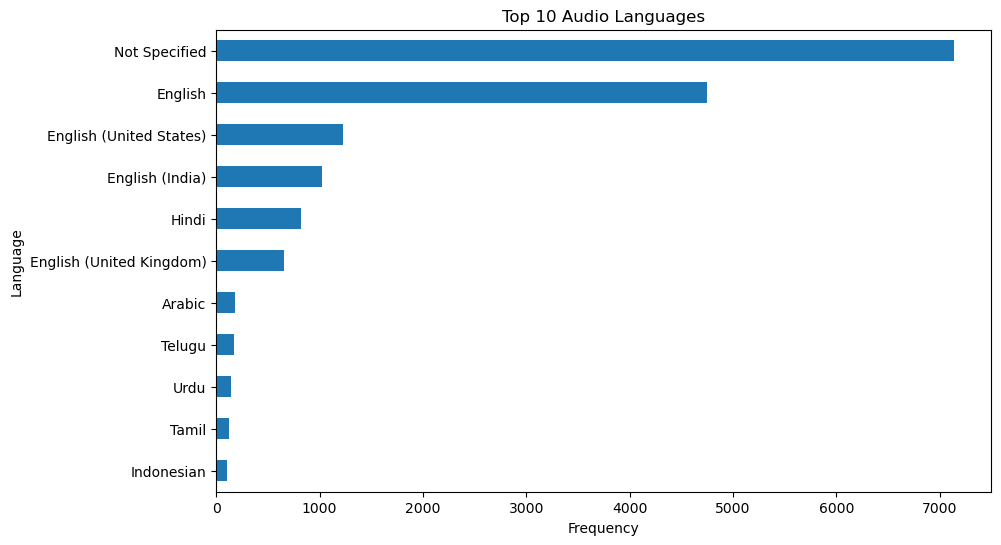

In [106]:
# Convert to percentage
audio_language_dist_frequency = audio_language_dist_fullnames 

# Plot as a bar chart
audio_language_dist_frequency.head(11).sort_values().plot(kind='barh', figsize=(10, 6))
plt.title('Top 10 Audio Languages')
plt.xlabel('Frequency')
plt.ylabel('Language')
plt.show()


#### Textual Language

In [ ]:
# Replace 'N/A' with 'Not Specified'
merged_videos_df['textual_language'] = merged_videos_df['textual_language'].fillna('Not Specified')

# Use the language mapping dictionary to replace existing textual_language values
merged_videos_df['textual_language'] = merged_videos_df['textual_language'].map(language_mapping).fillna(merged_videos_df['textual_language'])

# Calculate the language distribution after conversion
textual_language_dist = merged_videos_df['textual_language'].value_counts()


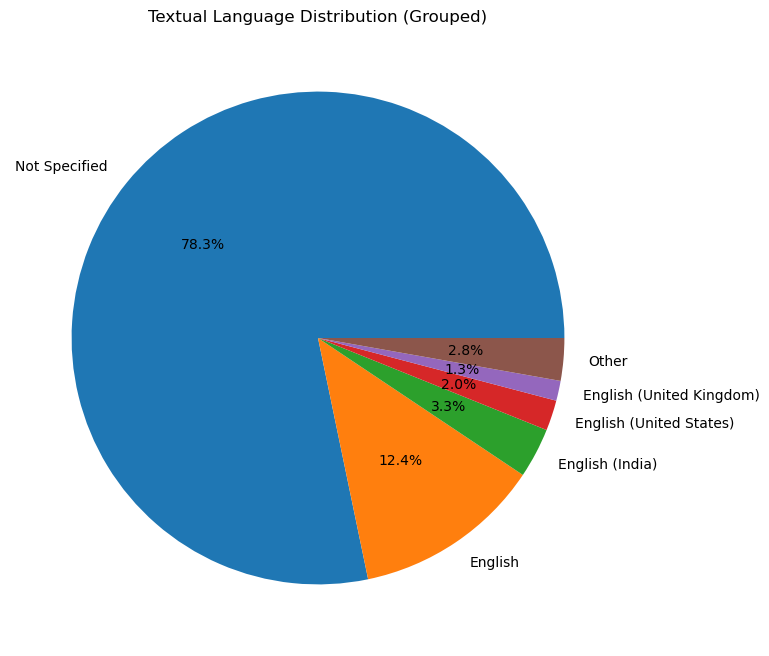

In [113]:
textual_language_dist_fullnames = textual_language_dist.rename(index=language_mapping)
# Get the top 5 languages, group others as "Other"
top_languages = textual_language_dist_fullnames.nlargest(5)
textual_language_dist_fullnames['Other'] = textual_language_dist_fullnames[~textual_language_dist_fullnames.index.isin(top_languages.index)].sum()
filtered_textual_language_dist = textual_language_dist_fullnames[top_languages.index.tolist() + ['Other']]

# Plot the updated pie chart
filtered_textual_language_dist.plot(
    kind='pie', autopct='%1.1f%%', figsize=(8, 8), labels=filtered_textual_language_dist.index
)
plt.title('Textual Language Distribution (Grouped)')
plt.ylabel('')
plt.show()

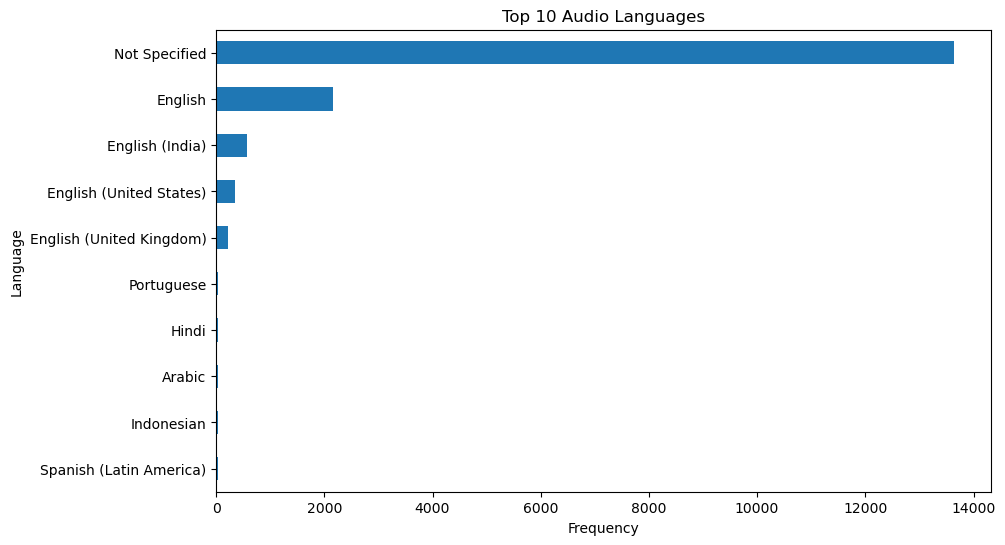

In [ ]:
# Convert to percentage
textual_language_dist_frequency = textual_language_dist_fullnames 

# Plot as a bar chart
textual_language_dist_frequency.head(10).sort_values().plot(kind='barh', figsize=(10, 6))
plt.title('Top 10 Textual Languages')
plt.xlabel('Frequency')
plt.ylabel('Language')
plt.show()

In [119]:
import pandas as pd

# 预处理
merged_videos_df['textual_language'] = merged_videos_df['textual_language'].fillna('Not Specified')
merged_videos_df['textual_language'] = merged_videos_df['textual_language'].map(language_mapping).fillna(merged_videos_df['textual_language'])

# 获取语言频次
language_counts = merged_videos_df['textual_language'].value_counts()

# Top 10 语言
top_10_languages = language_counts.nlargest(11).index.tolist()

# 总样本数量
total_count = len(merged_videos_df)

# 用于保存统计结果
results = []

# 统计Top 10
for lang in top_10_languages:
    lang_df = merged_videos_df[merged_videos_df['textual_language'] == lang]
    count = len(lang_df)
    percentage = round(count / total_count * 100, 2)
    results.append({
        'language': lang,
        'count': count,
        'percentage': percentage,
        'view_count_median': lang_df['view_count'].median(),
        'comment_count_median': lang_df['comment_count'].median(),
        'like_count_median': lang_df['like_count'].median()
    })

# 统计Other
other_df = merged_videos_df[~merged_videos_df['textual_language'].isin(top_10_languages)]
other_count = len(other_df)
other_percentage = round(other_count / total_count * 100, 2)
results.append({
    'language': 'Other',
    'count': other_count,
    'percentage': other_percentage,
    'view_count_median': other_df['view_count'].median(),
    'comment_count_median': other_df['comment_count'].median(),
    'like_count_median': other_df['like_count'].median()
})

# 转为DataFrame查看结果
textual_stats_df = pd.DataFrame(results)
textual_stats_df = textual_stats_df.sort_values(by='count', ascending=False)


In [120]:
print(textual_stats_df)

                    language  count  percentage  view_count_median  \
0              Not Specified  13644       78.26             2198.0   
1                    English   2155       12.36             2989.0   
2            English (India)    573        3.29              753.0   
3    English (United States)    348        2.00             2055.0   
11                     Other    307        1.76             4205.0   
4   English (United Kingdom)    228        1.31             3581.5   
5                 Portuguese     37        0.21             9946.0   
6                      Hindi     34        0.20            15230.0   
7                     Arabic     30        0.17             3041.0   
8    Spanish (Latin America)     27        0.15            15716.0   
9                 Indonesian     27        0.15             3394.0   
10                    German     24        0.14              818.5   

    comment_count_median  like_count_median  
0                    2.0               30.0

### Channel Country

In [121]:
# Check for missing values in 'country'
missing_count = video_channels_df['country'].isnull().sum()
print(f"Missing values in 'country': {missing_count}")

# Fill missing values with 'Not Specified'
video_channels_df['country'] = video_channels_df['country'].fillna('Not Specified')

# Get full value counts
country_counts = video_channels_df['country'].value_counts()

# Show top 10 + "Other"
top_10 = country_counts.head(11)
other_count = country_counts.iloc[11:].sum()

# Append 'Other' to the result
top_10_with_other = top_10.append(pd.Series({'Other': other_count}))

print(top_10_with_other)


Missing values in 'country': 0
Not Specified    2549
IN               2100
US               1051
PK                249
GB                167
ID                114
CA                114
DE                 92
BR                 72
EG                 57
AU                 48
Other             974
dtype: int64


C:\Users\Win10\AppData\Local\Temp\ipykernel_40272\1333763114.py:16: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [126]:
# Check for missing values in 'country'
missing_count = video_channels_df['country'].isnull().sum()
print(f"Missing values in 'country': {missing_count}")

# Fill missing values with 'Not Specified'
video_channels_df['country'] = video_channels_df['country'].fillna('Not Specified')

# Get full value counts
country_counts = video_channels_df['country'].value_counts()

# Show top 10 + "Other"
top_10 = country_counts.head(11)
other_count = country_counts.iloc[11:].sum()

# Append 'Other' to the result
top_10_with_other = top_10.append(pd.Series({'Other': other_count}))

print(top_10_with_other)


Missing values in 'country': 0
Not Specified    2549
IN               2100
US               1051
PK                249
GB                167
ID                114
CA                114
DE                 92
BR                 72
EG                 57
AU                 48
Other             974
dtype: int64


C:\Users\Win10\AppData\Local\Temp\ipykernel_40272\1333763114.py:16: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



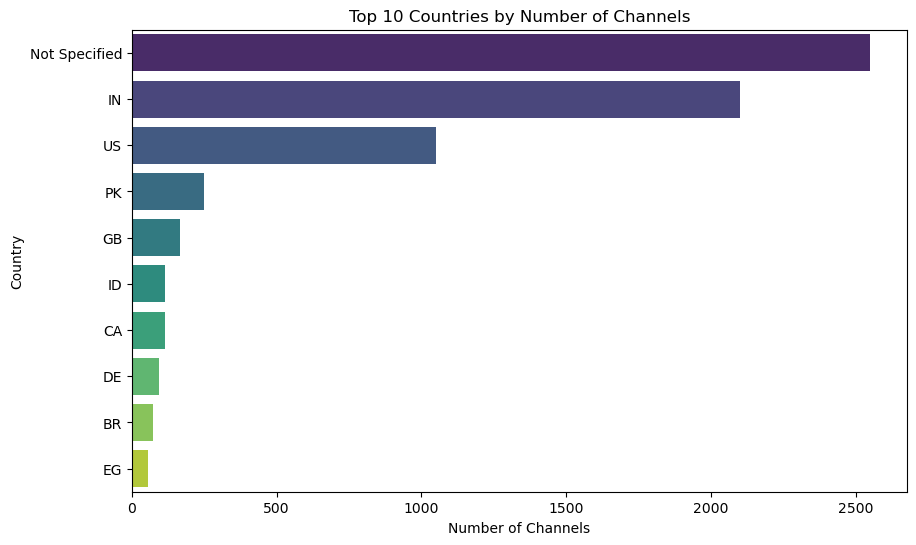

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of channels per country
country_counts = video_channels_df['country'].value_counts()

#  Get the top 10 countries
top_10_countries = country_counts.head(10)

# Plot the top 10 countries
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_countries.values, y=top_10_countries.index, palette="viridis")
plt.title('Top 10 Countries by Number of Channels')
plt.xlabel('Number of Channels')
plt.ylabel('Country')
plt.show()


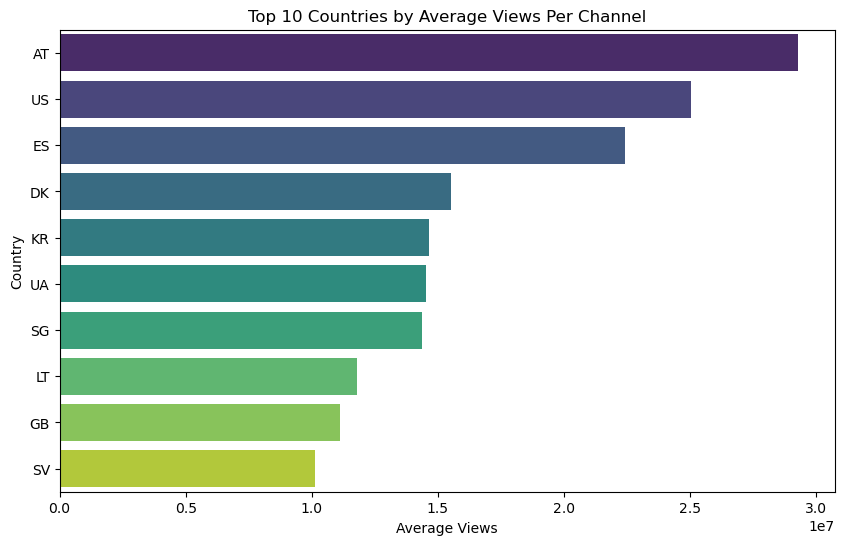

In [76]:
# Calculate the average views per channel for each country
country_avg_views = video_channels_df.groupby('country')['view_count'].mean().sort_values(ascending=False)

# Get the top 10 countries
top_10_avg_views = country_avg_views.head(10)

# Plot the top 10 countries by average views
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_avg_views.values, y=top_10_avg_views.index, palette="viridis")
plt.title('Top 10 Countries by Average Views Per Channel')
plt.xlabel('Average Views')
plt.ylabel('Country')
plt.show()


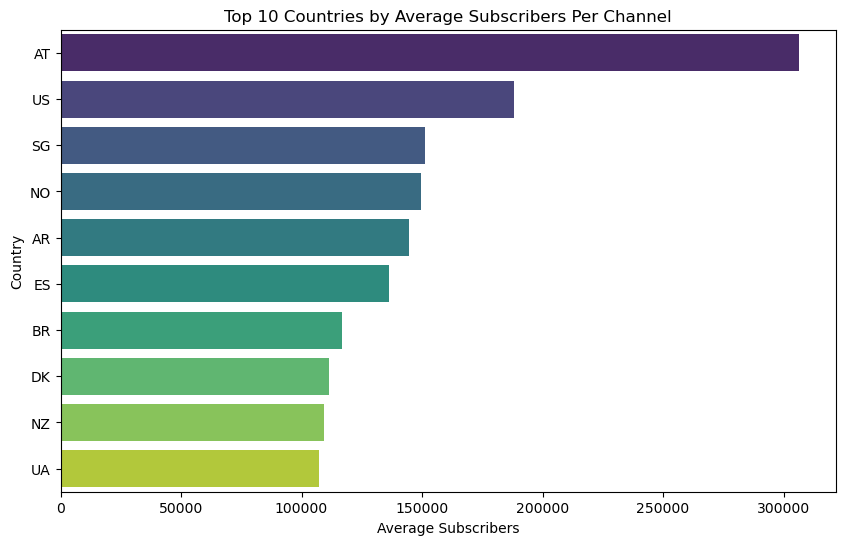

In [77]:
# Calculate the average subscribers per channel for each country
country_avg_subscribers = video_channels_df.groupby('country')['subscriber_count'].mean().sort_values(ascending=False)

# Get the top 10 countries
top_10_avg_subscribers = country_avg_subscribers.head(10)

# Plot the top 10 countries by average subscribers
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_avg_subscribers.values, y=top_10_avg_subscribers.index, palette="viridis")
plt.title('Top 10 Countries by Average Subscribers Per Channel')
plt.xlabel('Average Subscribers')
plt.ylabel('Country')
plt.show()


In [78]:

%pip install pycountry

import plotly.express as px
import pycountry

# Convert ISO-2 to ISO-3
def convert_iso2_to_iso3(code):
    try:
        return pycountry.countries.get(alpha_2=code).alpha_3
    except AttributeError:
        return None

# Map ISO-2 to ISO-3 in the dataset
video_channels_df['iso_alpha_3'] = video_channels_df['country'].apply(convert_iso2_to_iso3)

# Handle 'Unknown' entries
video_channels_df['iso_alpha_3'] = video_channels_df['iso_alpha_3'].fillna('Unknown')

# Aggregate channel count by ISO-3 country codes
country_counts = video_channels_df.groupby('iso_alpha_3').size().reset_index(name='channel_count')

# Plot choropleth map
fig = px.choropleth(
    country_counts,
    locations='iso_alpha_3',
    locationmode='ISO-3',
    color='channel_count',
    color_continuous_scale='Viridis',
    title='Number of Channels by Country'
)
fig.show()



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [79]:
# merge the two dataframes
merged_data = merged_videos_df.merge(video_channels_df, on='channel_id', how='inner')
print(merged_data.describe())

       view_count_x     like_count  comment_count  duration_minutes  \
count  1.743400e+04   17434.000000   17434.000000      17434.000000   
mean   4.531946e+04     840.010325      30.527647         21.371825   
std    2.887082e+05    5449.919558     184.854732         47.083227   
min    0.000000e+00       0.000000       0.000000          0.000000   
25%    2.830000e+02       5.000000       0.000000          4.816667   
50%    2.273500e+03      33.000000       2.000000         10.033333   
75%    1.508050e+04     210.000000      12.000000         21.962500   
max    1.906448e+07  356316.000000   11494.000000       1753.783333   

        topic_count  publish_year  view_count_y  subscriber_count  \
count  17434.000000  17434.000000  1.743400e+04      1.743400e+04   
mean       1.032982   2020.659573  3.239917e+07      2.499719e+05   
std        0.217414      2.979736  1.621911e+08      1.143930e+06   
min        1.000000   2007.000000  2.000000e+00      0.000000e+00   
25%        1.00

In [81]:
# Group by country and count the number of videos
country_video_counts = merged_data.groupby('country').size().reset_index(name='video_count')

# Sort the countries by video count
country_video_counts = country_video_counts.sort_values(by='video_count', ascending=False)

print(country_video_counts.head(10))

          country  video_count
42             IN         6507
71  Not Specified         4221
97             US         2918
75             PK          566
30             GB          384
13             CA          227
20             DE          207
39             ID          163
4              AU          143
11             BR          129


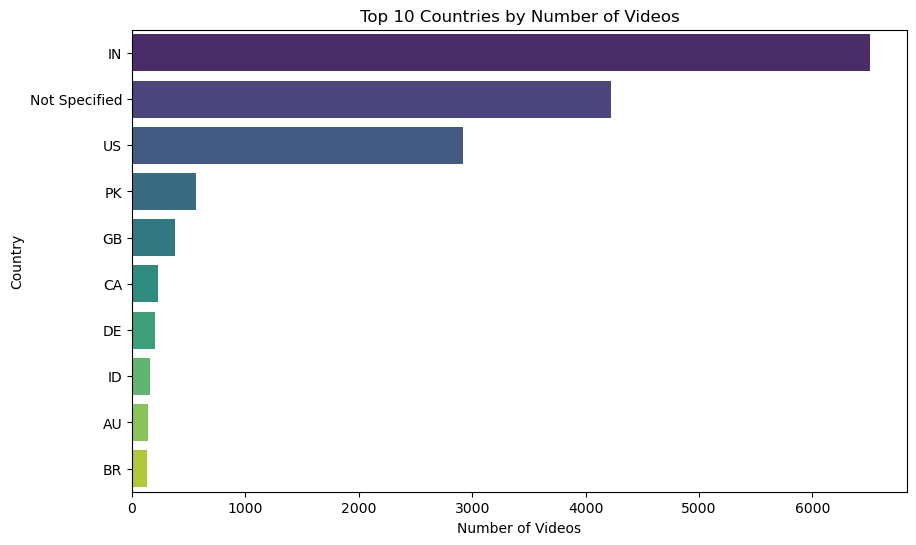

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 10 countries by video count
top_10_countries = country_video_counts.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_countries['video_count'], y=top_10_countries['country'], palette="viridis")
plt.title('Top 10 Countries by Number of Videos')
plt.xlabel('Number of Videos')
plt.ylabel('Country')
plt.show()


In [137]:
# Step 1: 排序并确定前10国家
country_video_counts = country_video_counts.sort_values(by='video_count', ascending=False)
top_10_countries = country_video_counts.head(11)['country']

# Step 2: 每国频道数统计
channel_counts = video_channels_df['country'].value_counts().reset_index()
channel_counts.columns = ['country', 'channels']

# Step 3: 视频维度的中位统计（view、like、comment）
video_medians = merged_data.groupby('country').agg(
    median_view_count=('view_count_x', 'median'),
    median_like_count=('like_count', 'median'),
    median_comment_count=('comment_count', 'median')
).reset_index()

# Step 4: 频道维度的中位统计（video_count、subscriber_count）
channel_medians = video_channels_df.groupby('country').agg(
    median_video_count=('video_count', 'median'),
    median_subscriber_count=('subscriber_count', 'median')
).reset_index()

# Step 5: 合并基础数据
country_stats = country_video_counts.merge(channel_counts, on='country', how='left')
country_stats = country_stats.merge(video_medians, on='country', how='left')
country_stats = country_stats.merge(channel_medians, on='country', how='left')

# Step 6: 计算每国视频占比
total_videos = country_stats['video_count'].sum()
country_stats['percentage'] = (country_stats['video_count'] / total_videos) * 100

# Step 7: 前10国家 + Other
top_10_stats = country_stats[country_stats['country'].isin(top_10_countries)]
other_rows = country_stats[~country_stats['country'].isin(top_10_countries)]

# Step 8: Other 汇总行
other_row = pd.DataFrame([{
    'country': 'Other',
    'video_count': other_rows['video_count'].sum(),
    'channels': other_rows['channels'].sum(),
    'median_view_count': other_rows['median_view_count'].median(),
    'median_like_count': other_rows['median_like_count'].median(),
    'median_comment_count': other_rows['median_comment_count'].median(),
    'median_video_count': other_rows['median_video_count'].median(),
    'median_subscriber_count': other_rows['median_subscriber_count'].median(),
    'percentage': (other_rows['video_count'].sum() / total_videos) * 100
}])

# Step 9: 合并最终结果
final_stats = pd.concat([top_10_stats, other_row], ignore_index=True)

# Step 10: 打印结果
print(final_stats)


          country  video_count  percentage iso_alpha_3  channels  \
0              IN         6507   37.323621         IND      2100   
1   Not Specified         4221   24.211311        None      2549   
2              US         2918   16.737410         USA      1051   
3              PK          566    3.246530         PAK       249   
4              GB          384    2.202593         GBR       167   
5              CA          227    1.302053         CAN       114   
6              DE          207    1.187335         DEU        92   
7              ID          163    0.934955         IDN       114   
8              AU          143    0.820236         AUS        48   
9              BR          129    0.739933         BRA        72   
10             EG          123    0.705518         EGY        57   
11          Other         1846   10.588505         NaN       974   

    median_view_count  median_like_count  median_comment_count  \
0              3886.0               59.0         

In [132]:
# Get the top 11 countries by number of videos
top_11_countries = country_video_counts.head(11)['country']

# Filter the merged_videos_df to include only videos from the top 11 countries
filtered_videos_df = merged_data[merged_data['country'].isin(top_11_countries)]

# Calculate the median view count for each of the top 11 countries
median_view_count_per_country = filtered_videos_df.groupby('country')['view_count_x'].median().reset_index()

# Rename columns for clarity
median_view_count_per_country.columns = ['country', 'median_view_count']

# Display the result
print(median_view_count_per_country)

          country  median_view_count
0              AU             3844.0
1              BR             6590.0
2              CA             2633.0
3              DE             3142.0
4              EG             1487.0
5              GB             6385.5
6              ID             1360.0
7              IN             3886.0
8   Not Specified              617.0
9              PK              922.5
10             US             2763.0


In [85]:
# Filter the video_channels_df to include only channels from the top 11 countries
top_11_countries_list = top_11_countries.tolist()
filtered_channels_df = video_channels_df[video_channels_df['country'].isin(top_11_countries_list)]

# Calculate the median number of subscribers for each country
median_subscribers_per_country = filtered_channels_df.groupby('country')['subscriber_count'].median().reset_index()

# Rename columns for clarity
median_subscribers_per_country.columns = ['country', 'median_subscriber_count']

# Display the result
print(median_subscribers_per_country)

          country  median_subscriber_count
0              AU                   4790.0
1              BR                   9045.0
2              CA                   2415.0
3              DE                   2785.0
4              EG                   4390.0
5              GB                   5570.0
6              ID                   1020.0
7              IN                   2240.0
8   Not Specified                    169.0
9              PK                   1380.0
10             US                   5330.0


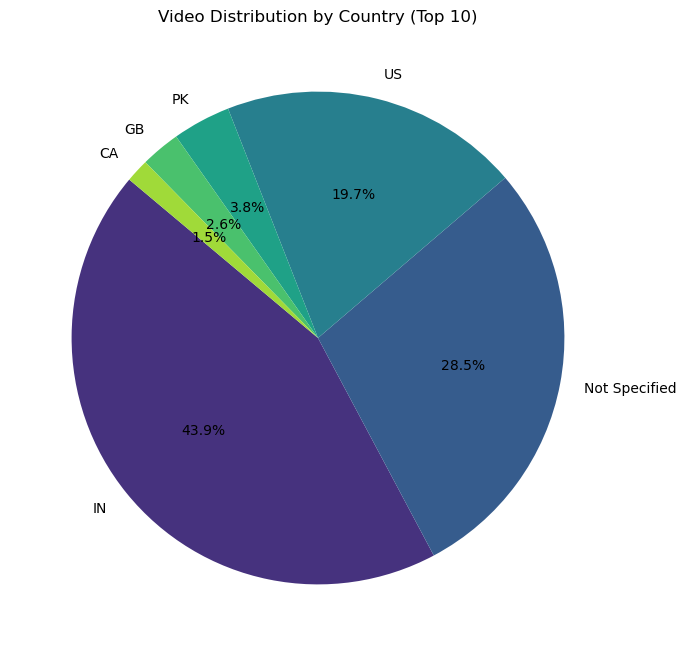

In [86]:
# pie chart
top_10_countries = country_video_counts.head(6)
plt.figure(figsize=(8, 8))
plt.pie(
    top_10_countries['video_count'],
    labels=top_10_countries['country'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("viridis", len(top_10_countries))
)
plt.title('Video Distribution by Country (Top 10)')
plt.show()

In [87]:
# Map ISO-2 to ISO-3 in the dataset
country_video_counts['iso_alpha_3'] = country_video_counts['country'].apply(convert_iso2_to_iso3)

In [88]:
import plotly.express as px

# Plot choropleth map
fig = px.choropleth(
    country_video_counts,
    locations='iso_alpha_3',  
    color='video_count',      
    hover_name='country',     
    color_continuous_scale='Viridis',  
    title='Number of Videos by Country'
)

fig.show()

### Paid Product Placement

In [89]:
paid_product_placement_counts = merged_videos_df['paid_product_placement'].value_counts()

print(paid_product_placement_counts)

false    17337
true        97
Name: paid_product_placement, dtype: int64


In [90]:
# Reset the index of the percentage DataFrame and rename columns
paid_product_percentage = merged_videos_df['paid_product_placement'].value_counts(normalize=True) * 100
paid_product_percentage = paid_product_percentage.reset_index()
paid_product_percentage.columns = ['paid_product_placement', 'percentage']

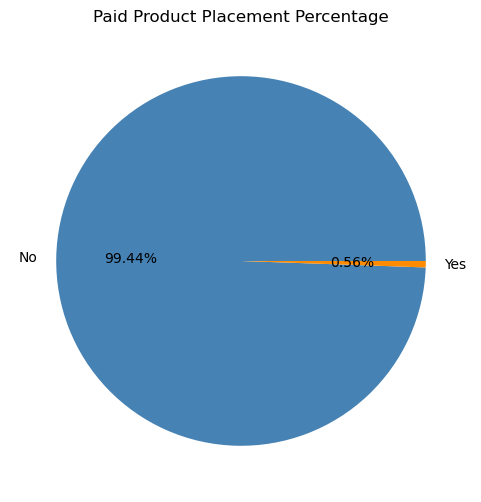

In [91]:
# Plot the pie chart
paid_product_placement_counts = merged_videos_df['paid_product_placement'].value_counts()
paid_product_placement_counts.plot(
    kind='pie', 
    autopct='%1.2f%%', 
    figsize=(6, 6), 
    labels=['No', 'Yes'], 
    colors=['steelblue', 'darkorange']
)
plt.title('Paid Product Placement Percentage')
plt.ylabel('')
plt.show()


In [92]:
definition_counts = merged_videos_df['definition'].value_counts()
print(definition_counts)

hd    16224
sd     1210
Name: definition, dtype: int64


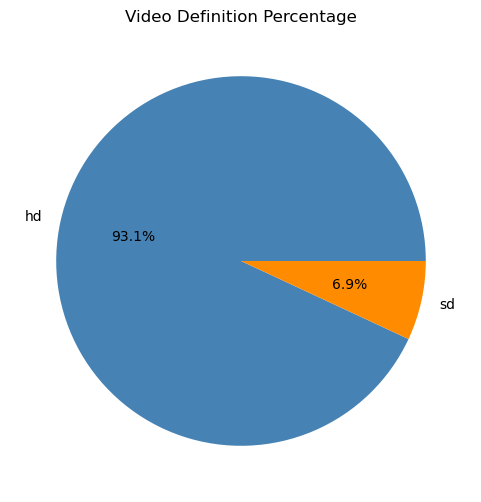

In [93]:
definition_counts.plot(
    kind='pie', autopct='%1.1f%%', figsize=(6, 6), labels=definition_counts.index, colors=['steelblue', 'darkorange']
)
plt.title('Video Definition Percentage')
plt.ylabel('')
plt.show()


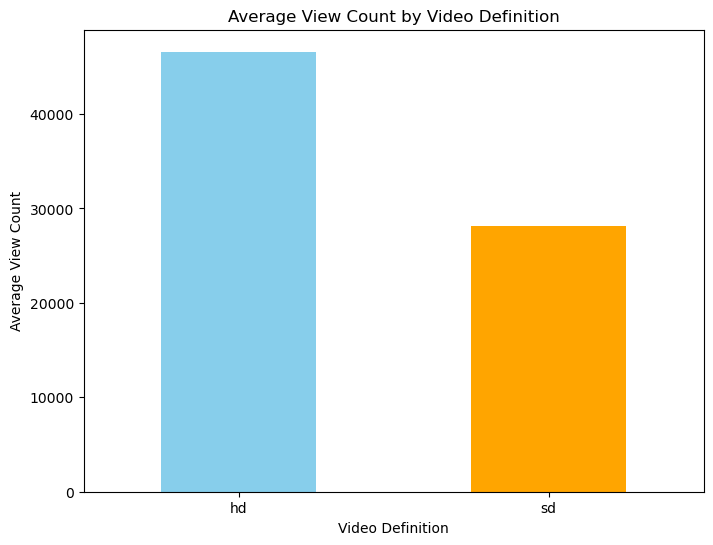

In [94]:
# Ensure the view_count column is numeric
merged_videos_df['view_count'] = pd.to_numeric(merged_videos_df['view_count'], errors='coerce')

# calculate the average view count for each video definition
definition_view_stats = merged_videos_df.groupby('definition')['view_count'].mean()

plt.figure(figsize=(8, 6))
definition_view_stats.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Average View Count by Video Definition')
plt.xlabel('Video Definition')
plt.ylabel('Average View Count')
plt.xticks(rotation=0)
plt.show()


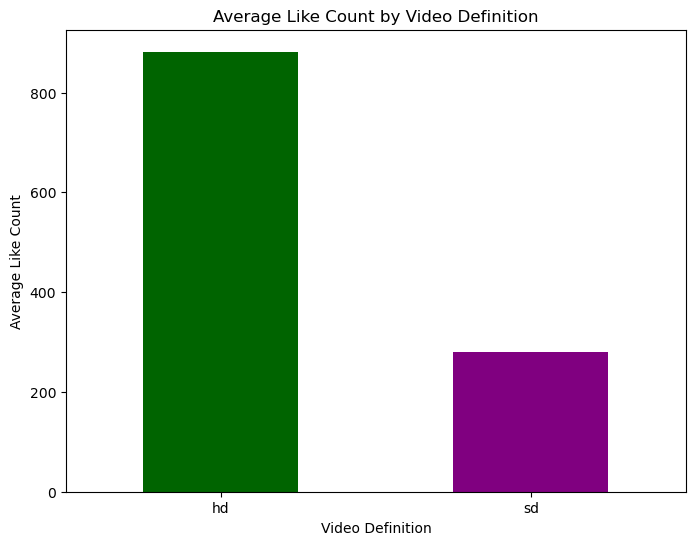

In [95]:
# Ensure the like_count column is numeric
merged_videos_df['like_count'] = pd.to_numeric(merged_videos_df['like_count'], errors='coerce')

# calculate the average like count for each video definition
definition_like_stats = merged_videos_df.groupby('definition')['like_count'].mean()

plt.figure(figsize=(8, 6))
definition_like_stats.plot(kind='bar', color=['darkgreen', 'purple'])
plt.title('Average Like Count by Video Definition')
plt.xlabel('Video Definition')
plt.ylabel('Average Like Count')
plt.xticks(rotation=0)
plt.show()


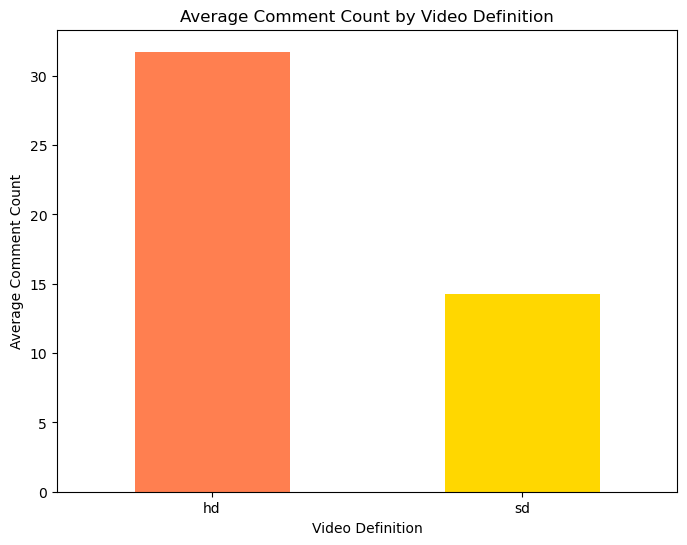

In [96]:
# Ensure the comment_count column is numeric
merged_videos_df['comment_count'] = pd.to_numeric(merged_videos_df['comment_count'], errors='coerce')

# calculate the average comment count for each video definition
definition_comment_stats = merged_videos_df.groupby('definition')['comment_count'].mean()

plt.figure(figsize=(8, 6))
definition_comment_stats.plot(kind='bar', color=['coral', 'gold'])
plt.title('Average Comment Count by Video Definition')
plt.xlabel('Video Definition')
plt.ylabel('Average Comment Count')
plt.xticks(rotation=0)
plt.show()


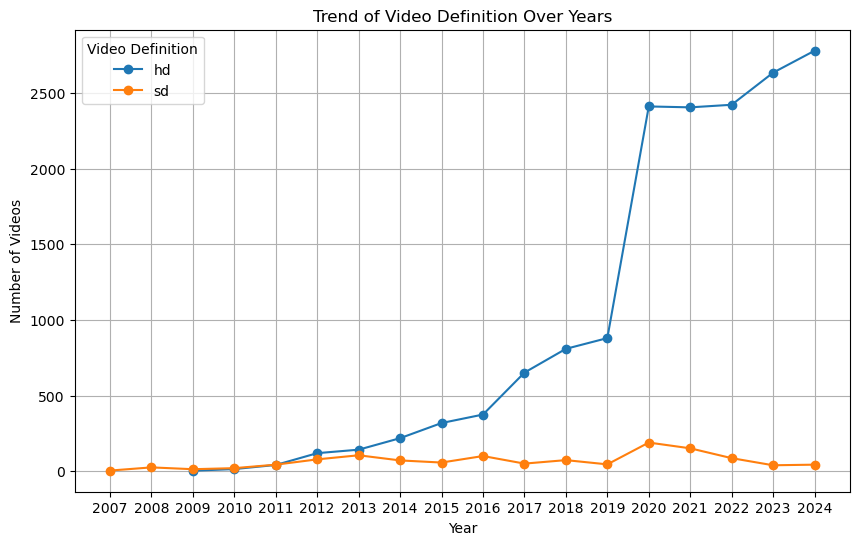

In [97]:
# Convert 'published_at' to datetime
merged_videos_df['published_year'] = pd.to_datetime(merged_videos_df['published_at']).dt.year.astype(int)

# Group by year and definition
definition_trend = merged_videos_df.groupby(['published_year', 'definition']).size().unstack()

# Plot the trend of video definition over the years
definition_trend.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Trend of Video Definition Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Videos')
plt.legend(title='Video Definition')
plt.xticks(definition_trend.index)  # Set x-axis ticks to integer years
plt.grid()
plt.show()


### Transcript Type

In [98]:
# merge the two dataframes
merged_df = merged_videos_df.merge(video_transcripts_df[['video_id', 'type']], on='video_id', how='left')

# Fill missing values with 'Not Available'
merged_df['type'] = merged_df['type'].fillna('Not Available')

print(merged_df[['video_id', 'type']].head())


      video_id            type
0  4YilEjkNPrQ  manual-created
1  G9ixeTIyg8s  manual-created
2  2hUVf17DHVs  manual-created
3  F6MBz_h3Uj8  manual-created
4  7LRH7DY1QbQ   Not Available


In [99]:
# Count the number of videos for each transcript type
transcript_type_counts = merged_df['type'].value_counts()

print(transcript_type_counts)


auto-generated                                                  9464
auto-generated (Translated from Hindi (auto-generated))         2880
Not Available                                                   2501
manual-created                                                   898
auto-generated (Translated from Indonesian (auto-generated))     268
                                                                ... 
auto-generated (Translated from Danish (auto-generated))           1
auto-generated (Translated from Slovak (auto-generated))           1
manual-created (Translated from Bangla)                            1
manual-created (Translated from German (Germany))                  1
manual-created (Translated from Dutch (Belgium))                   1
Name: type, Length: 62, dtype: int64


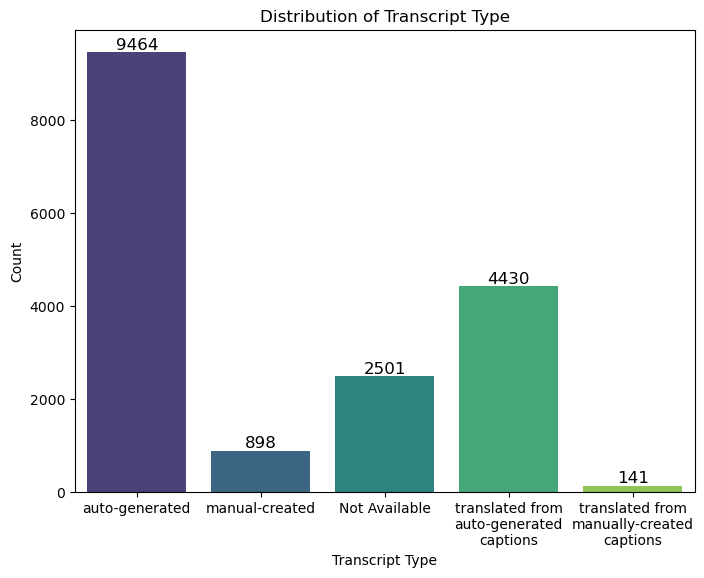

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import textwrap

# 归类
translated_auto = transcript_type_counts[
    transcript_type_counts.index.str.contains(r"Translated from", regex=True) & 
    transcript_type_counts.index.str.contains(r"auto-generated", regex=True)
].sum()

translated_manual = transcript_type_counts[
    transcript_type_counts.index.str.contains(r"Translated from", regex=True) & 
    transcript_type_counts.index.str.contains(r"manual-created", regex=True)
].sum()

# 创建新的分类
categories = {
    "auto-generated": transcript_type_counts.get("auto-generated", 0),
    "manual-created": transcript_type_counts.get("manual-created", 0),
    "Not Available": transcript_type_counts.get("Not Available", 0),
    "translated from auto-generated captions": translated_auto,
    "translated from manually-created captions": translated_manual
}

# 转换为 DataFrame
transcript_df = pd.DataFrame(list(categories.items()), columns=["Transcript Type", "Count"])

# 自动换行标签
transcript_df['Transcript Type'] = transcript_df['Transcript Type'].apply(lambda x: '\n'.join(textwrap.wrap(x, 20)))

# 绘图
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    x="Transcript Type",
    y="Count",
    data=transcript_df,
    palette="viridis"
)

# 添加标签
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title("Distribution of Transcript Type")
plt.xlabel("Transcript Type")
plt.ylabel("Count")
plt.xticks(rotation=0)  # 设置标签不旋转
plt.show()


In [101]:
# Define the new categories
def categorize_transcript_type(transcript_type):
    if transcript_type == "auto-generated":
        return "auto-generated"
    elif transcript_type == "manual-created":
        return "manual-created"
    elif "Translated from" in transcript_type and "auto-generated" in transcript_type:
        return "translated from auto-generated captions"
    elif "Translated from" in transcript_type and "manual-created" in transcript_type:
        return "translated from manually-created captions"
    else:
        return "Not Available"

# Apply the categorization function to the 'type' column
merged_df['categorized_transcript_type'] = merged_df['type'].apply(categorize_transcript_type)

# Check the results
print(merged_df[['type', 'categorized_transcript_type']].head())

             type categorized_transcript_type
0  manual-created              manual-created
1  manual-created              manual-created
2  manual-created              manual-created
3  manual-created              manual-created
4   Not Available               Not Available


In [102]:
# Calculate the median view count for each transcript type
median_view_count_per_transcript_type = merged_df.groupby('categorized_transcript_type')['view_count'].median().reset_index()

# Rename columns for clarity
median_view_count_per_transcript_type.columns = ['Transcript Type', 'Median View Count']

# Display the result
print(median_view_count_per_transcript_type)

                             Transcript Type  Median View Count
0                              Not Available             3313.0
1                             auto-generated             1667.0
2                             manual-created            14688.5
3    translated from auto-generated captions             2262.5
4  translated from manually-created captions            11698.0


In [103]:
# Calculate the median comment count for each transcript type
median_comment_count_per_transcript_type = merged_df.groupby('categorized_transcript_type')['comment_count'].median().reset_index()

# Rename columns for clarity
median_comment_count_per_transcript_type.columns = ['Transcript Type', 'Median Comment Count']

# Display the result
print(median_comment_count_per_transcript_type)

                             Transcript Type  Median Comment Count
0                              Not Available                   2.0
1                             auto-generated                   1.0
2                             manual-created                   6.0
3    translated from auto-generated captions                   3.0
4  translated from manually-created captions                  21.0


In [104]:
# Calculate the median like count for each transcript type
median_like_count_per_transcript_type = merged_df.groupby('categorized_transcript_type')['like_count'].median().reset_index()

# Rename columns for clarity
median_like_count_per_transcript_type.columns = ['Transcript Type', 'Median Like Count']

# Display the result
print(median_like_count_per_transcript_type)

                             Transcript Type  Median Like Count
0                              Not Available               35.0
1                             auto-generated               24.0
2                             manual-created              118.0
3    translated from auto-generated captions               40.5
4  translated from manually-created captions              165.0


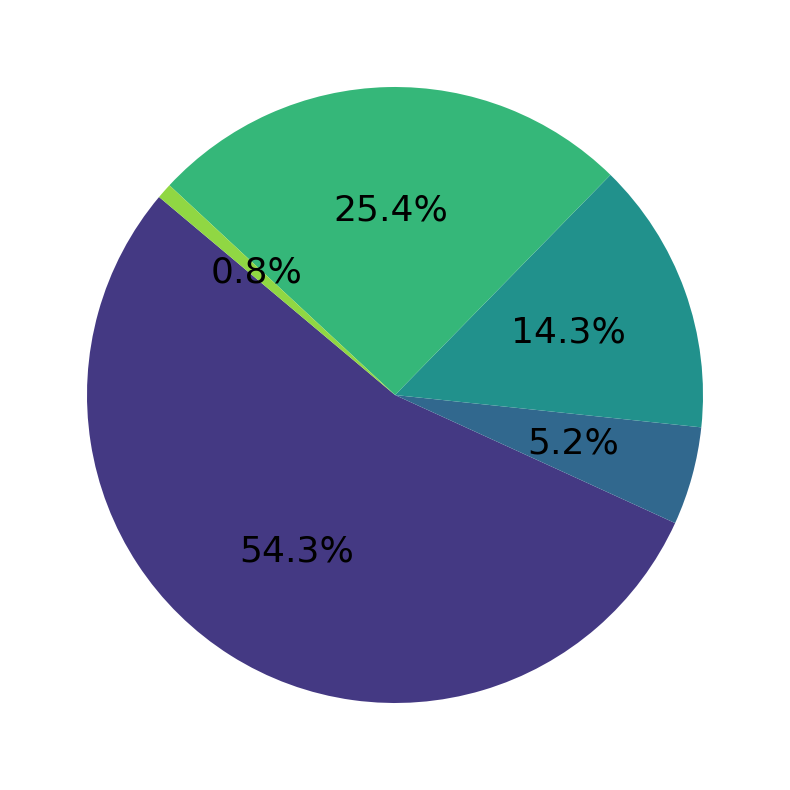

In [105]:
# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    transcript_df["Count"], 
    labels=None,
    # labels=df["Transcript Type"], 
    labeldistance=0.7,
    autopct="%1.1f%%", 
    startangle=140, 
    colors=sns.color_palette("viridis", len(transcript_df)),
    textprops={'fontsize': 26}
)
plt.tight_layout()
plt.show()


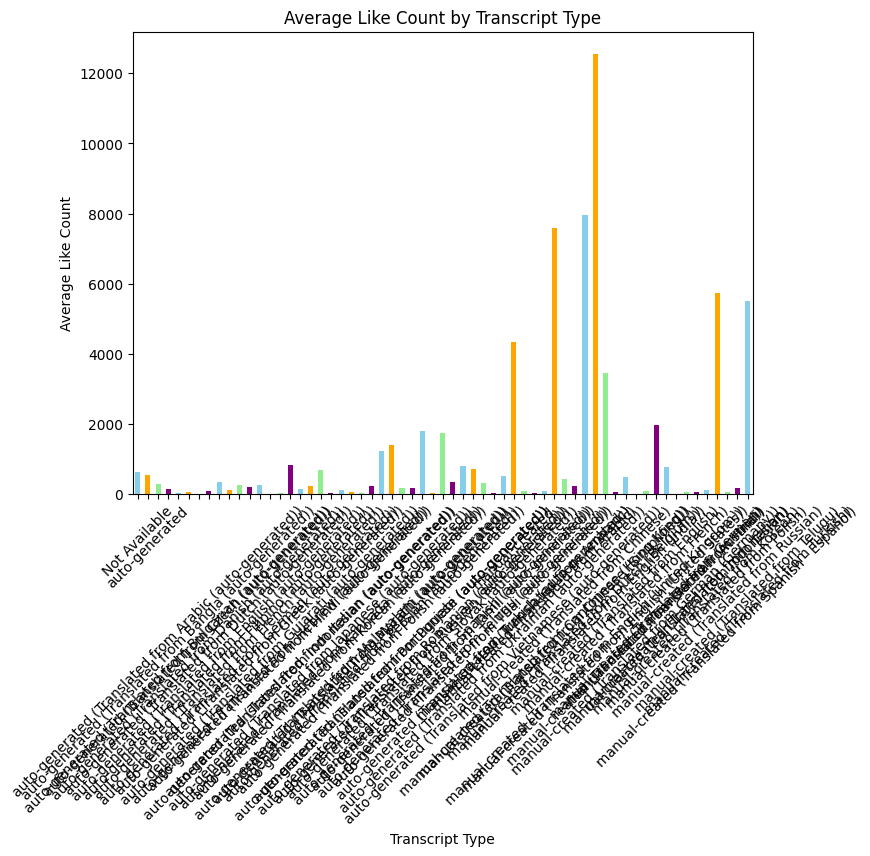

In [105]:
# Calculate the average like count for each transcript type
transcript_like_stats = merged_df.groupby('type')['like_count'].mean()

plt.figure(figsize=(8, 6))
transcript_like_stats.plot(kind='bar', color=['skyblue', 'orange', 'lightgreen', 'purple'])
plt.title('Average Like Count by Transcript Type')
plt.xlabel('Transcript Type')
plt.ylabel('Average Like Count')
plt.xticks(rotation=45)
plt.show()


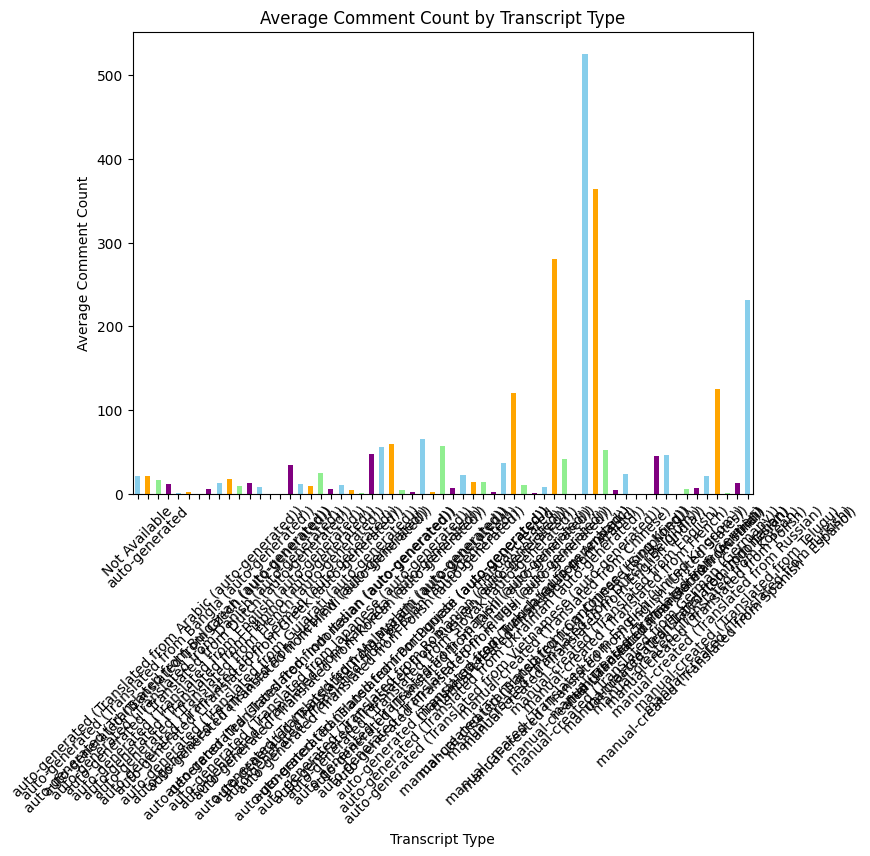

In [106]:
# Calculate the average comment count for each transcript type
transcript_comment_stats = merged_df.groupby('type')['comment_count'].mean()

plt.figure(figsize=(8, 6))
transcript_comment_stats.plot(kind='bar', color=['skyblue', 'orange', 'lightgreen', 'purple'])
plt.title('Average Comment Count by Transcript Type')
plt.xlabel('Transcript Type')
plt.ylabel('Average Comment Count')
plt.xticks(rotation=45)
plt.show()


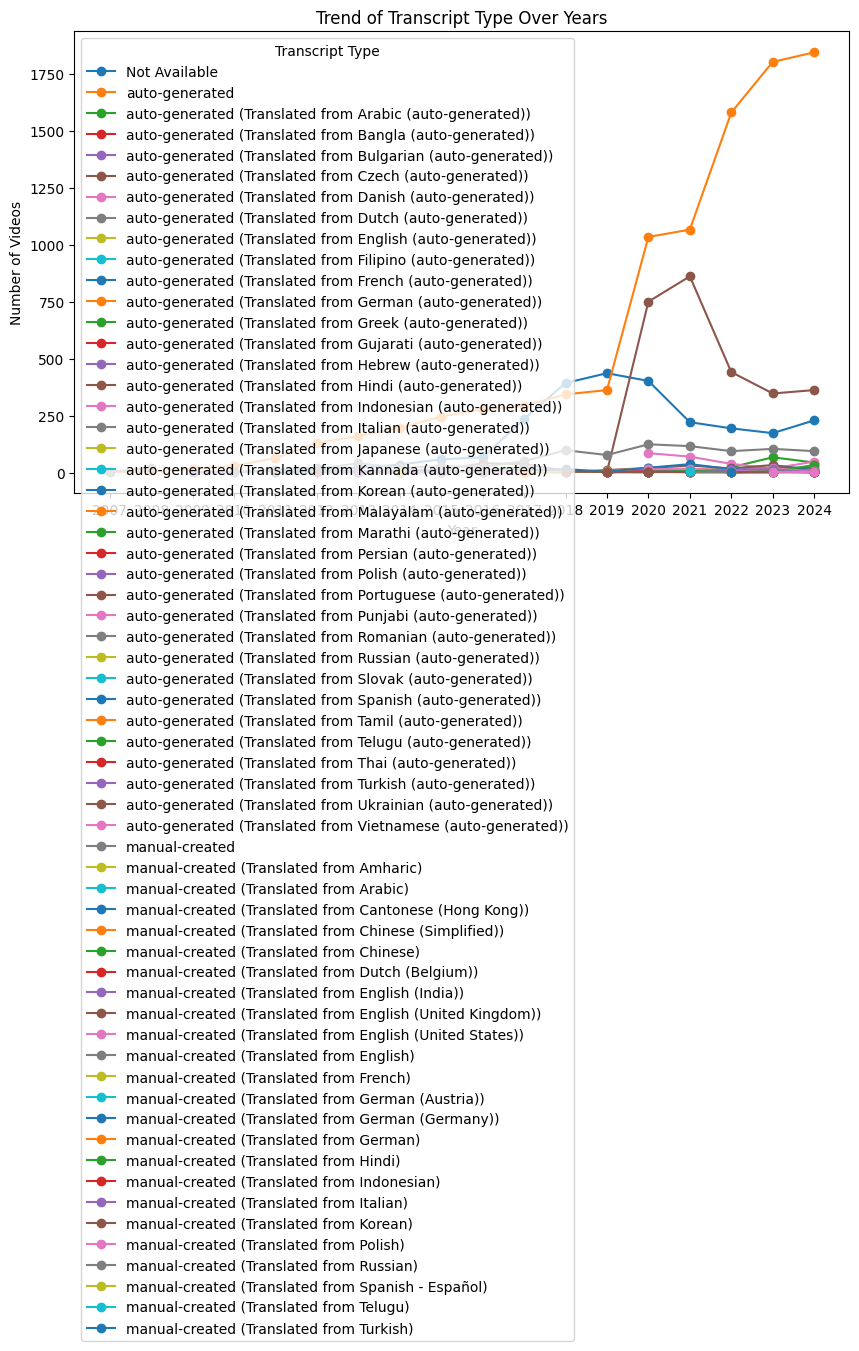

In [107]:
# Convert 'published_at' to datetime
merged_df['published_year'] = pd.to_datetime(merged_df['published_at']).dt.year.astype(int)

# Group by year and type
transcript_trend = merged_df.groupby(['published_year', 'type']).size().unstack()

# Plot the trend of transcript type over the years
transcript_trend.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Trend of Transcript Type Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Videos')
plt.legend(title='Transcript Type')
plt.xticks(transcript_trend.index)  # Set x-axis ticks to integer years
plt.show()


### Video Duration

In [108]:
import re

def parse_duration_to_seconds(duration):
    try:
        # Handle "1 day, HH:MM:SS" or similar cases
        if "day" in duration:
            days, time_part = duration.split(", ")
            days = int(days.split()[0])  # Extract the number of days
            time_parts = list(map(int, time_part.split(":")))
            hours, minutes, seconds = time_parts if len(time_parts) == 3 else (0, *time_parts)
            return days * 86400 + hours * 3600 + minutes * 60 + seconds
        else:
            # Handle "HH:MM:SS", "MM:SS", or "SS"
            time_parts = list(map(int, duration.split(":")))
            if len(time_parts) == 3:
                hours, minutes, seconds = time_parts
            elif len(time_parts) == 2:
                hours, minutes, seconds = 0, *time_parts
            elif len(time_parts) == 1:
                hours, minutes, seconds = 0, 0, time_parts[0]
            else:
                hours, minutes, seconds = 0, 0, 0
            return hours * 3600 + minutes * 60 + seconds
    except Exception as e:
        # Handle unexpected formats gracefully
        print(f"Error parsing duration '{duration}': {e}")
        return 0  # Default to 0 seconds for invalid durations

# Apply the updated function
merged_videos_df['duration_seconds'] = merged_videos_df['duration'].apply(parse_duration_to_seconds)

# Check the results
print(merged_videos_df[['duration', 'duration_seconds']].head())


  duration  duration_seconds
0  0:04:24               264
1  0:06:19               379
2  0:06:33               393
3  0:06:18               378
4  0:07:41               461


In [109]:
print(merged_videos_df['duration_seconds'].describe())

count     17434.000000
mean       1282.309510
std        2824.993638
min           0.000000
25%         289.000000
50%         602.000000
75%        1317.750000
max      105227.000000
Name: duration_seconds, dtype: float64


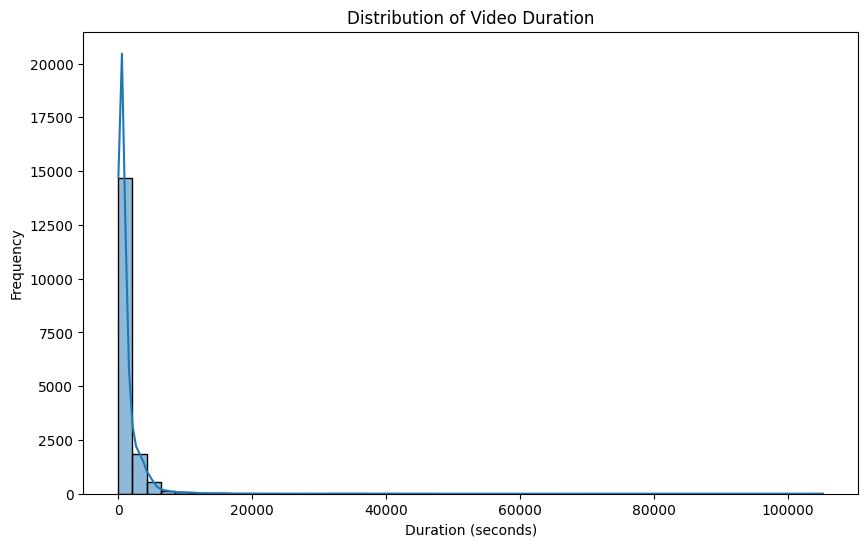

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(merged_videos_df['duration_seconds'], bins=50, kde=True)
plt.title('Distribution of Video Duration')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()


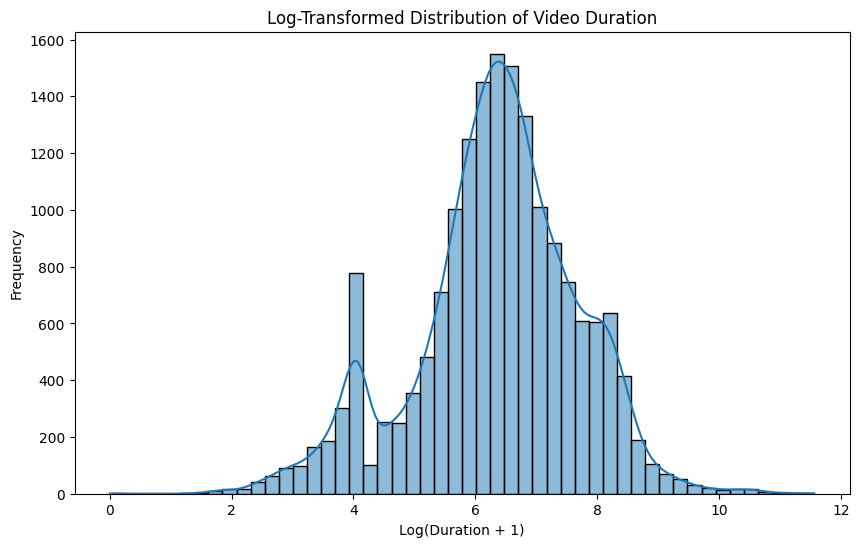

In [111]:
import numpy as np

# Apply log transformation to the duration
merged_videos_df['log_duration_seconds'] = np.log1p(merged_videos_df['duration_seconds'])  # log1p to avoid log(0)

# Plot the distribution of log-transformed video duration
plt.figure(figsize=(10, 6))
sns.histplot(merged_videos_df['log_duration_seconds'], bins=50, kde=True)
plt.title('Log-Transformed Distribution of Video Duration')
plt.xlabel('Log(Duration + 1)')
plt.ylabel('Frequency')
plt.show()


In [112]:
# plt.figure(figsize=(8, 6))
# sns.boxplot(x=merged_videos_df['duration_seconds'])
# plt.title('Boxplot of Video Duration')
# plt.xlabel('Duration (seconds)')
# plt.show()


In [113]:
# # Apply log transformation to the duration
# merged_videos_df['log_duration_seconds'] = np.log1p(merged_videos_df['duration_seconds'])

# # Plot the boxplot of log-transformed video duration
# plt.figure(figsize=(8, 6))
# sns.boxplot(x=merged_videos_df['log_duration_seconds'])
# plt.title('Boxplot of Log-Transformed Video Duration')
# plt.xlabel('Log(Duration + 1)')
# plt.show()


duration_category
Medium (5-20 min)    8150
Long (>20 min)       4746
Short (<5 min)       4538
Name: count, dtype: int64


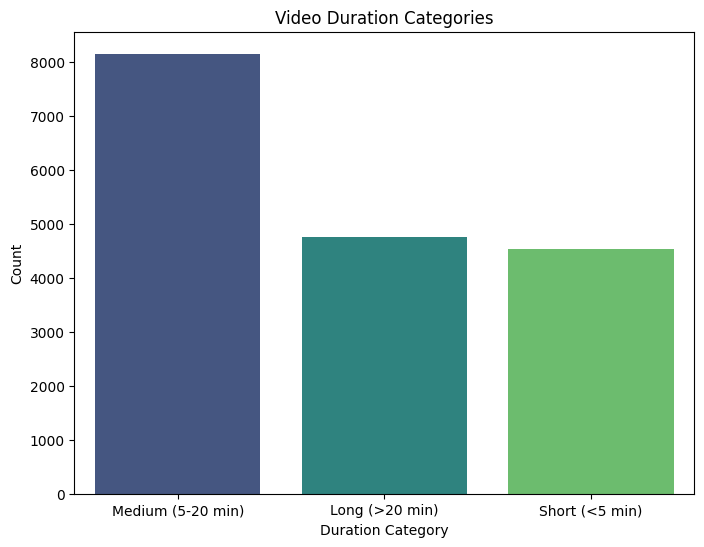

In [114]:
# categorize video duration
def categorize_duration(seconds):
    if seconds < 300:
        return 'Short (<5 min)'
    elif seconds <= 1200:
        return 'Medium (5-20 min)'
    else:
        return 'Long (>20 min)'

# define a new column for duration category
merged_videos_df['duration_category'] = merged_videos_df['duration_seconds'].apply(categorize_duration)

duration_category_counts = merged_videos_df['duration_category'].value_counts()
print(duration_category_counts)

plt.figure(figsize=(8, 6))
sns.barplot(
    x=duration_category_counts.index, 
    y=duration_category_counts.values, 
    hue=duration_category_counts.index,
    palette='viridis')
plt.title('Video Duration Categories')
plt.xlabel('Duration Category')
plt.ylabel('Count')
plt.show()


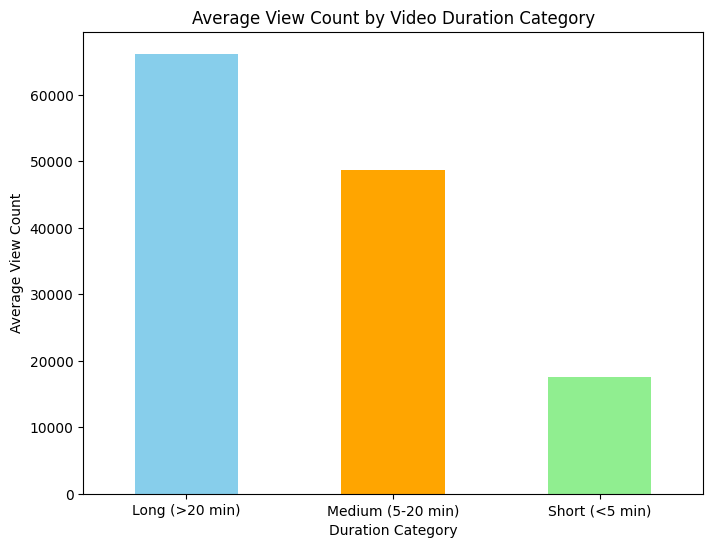

In [115]:
# Calculate the average view count for each video duration category
duration_view_stats = merged_videos_df.groupby('duration_category')['view_count'].mean()

plt.figure(figsize=(8, 6))
duration_view_stats.plot(kind='bar', color=['skyblue', 'orange', 'lightgreen'])
plt.title('Average View Count by Video Duration Category')
plt.xlabel('Duration Category')
plt.ylabel('Average View Count')
plt.xticks(rotation=0)
plt.show()


In [116]:
# # group by definition and calculate the average duration
# definition_duration_stats = merged_videos_df.groupby('definition')['duration_seconds'].mean()

# plt.figure(figsize=(8, 6))
# definition_duration_stats.plot(kind='bar', color=['skyblue', 'orange'])
# plt.title('Average Video Duration by Definition')
# plt.xlabel('Video Definition')
# plt.ylabel('Average Duration (seconds)')
# plt.xticks(rotation=0)
# plt.show()


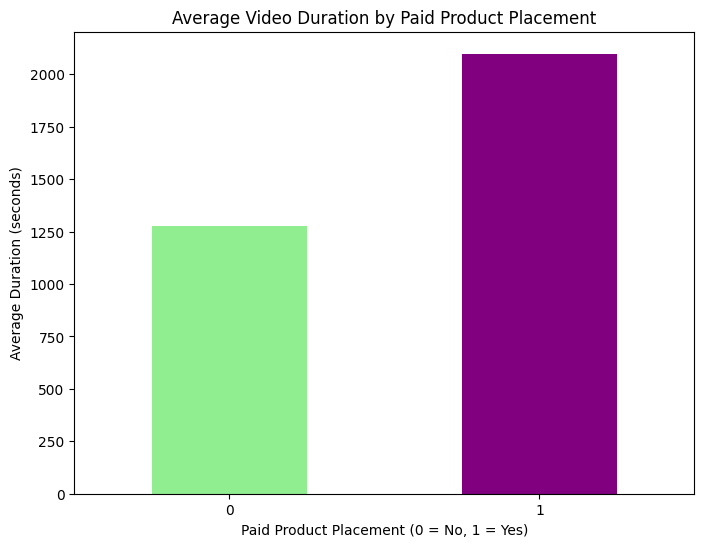

In [117]:
# group by paid product placement and calculate the average duration
paid_duration_stats = merged_videos_df.groupby('paid_product_placement')['duration_seconds'].mean()

plt.figure(figsize=(8, 6))
paid_duration_stats.plot(kind='bar', color=['lightgreen', 'purple'])
plt.title('Average Video Duration by Paid Product Placement')
plt.xlabel('Paid Product Placement (0 = No, 1 = Yes)')
plt.ylabel('Average Duration (seconds)')
plt.xticks(rotation=0)
plt.show()

In [31]:
# Convert 'published_at' to datetime
merged_videos_df['published_year'] = pd.to_datetime(merged_videos_df['published_at']).dt.year.astype(int)

# Group by year and calculate the average duration
duration_trend = merged_videos_df.groupby('published_year')['duration_seconds'].median()

plt.figure(figsize=(10, 6))
duration_trend.plot(kind='line', marker='o', color='skyblue')
plt.title('Trend of Video Duration Over Years')
plt.xlabel('Year')
plt.ylabel('Average Duration (seconds)')
plt.xticks(duration_trend.index)  # Set x-axis ticks to integer years
plt.show()

KeyError: 'Column not found: duration_seconds'

### Channel Subscriber

In [62]:
# Check for missing values in the subscriber_count column
missing_subscribers = video_channels_df['subscriber_count'].isnull().sum()
print(f"Missing values in subscriber_count: {missing_subscribers}")

# Fill missing values with 0
video_channels_df['subscriber_count'] = video_channels_df['subscriber_count'].fillna(0)

# Display basic statistics for subscriber_count
print(video_channels_df['subscriber_count'].describe())

Missing values in subscriber_count: 0
count    1.011500e+04
mean     1.144469e+05
std      9.992756e+05
min      0.000000e+00
25%      1.820000e+02
50%      1.460000e+03
75%      1.100000e+04
max      4.220000e+07
Name: subscriber_count, dtype: float64


In [63]:
# Check for invalid values in subscriber_count
print(video_channels_df['subscriber_count'].isnull().sum())  # Count NaN values
print((video_channels_df['subscriber_count'] <= 0).sum())   # Count zero or negative values

0
165


In [64]:
video_channels_df = video_channels_df[video_channels_df['subscriber_count'] > 0]        # Remove 0 or negative values

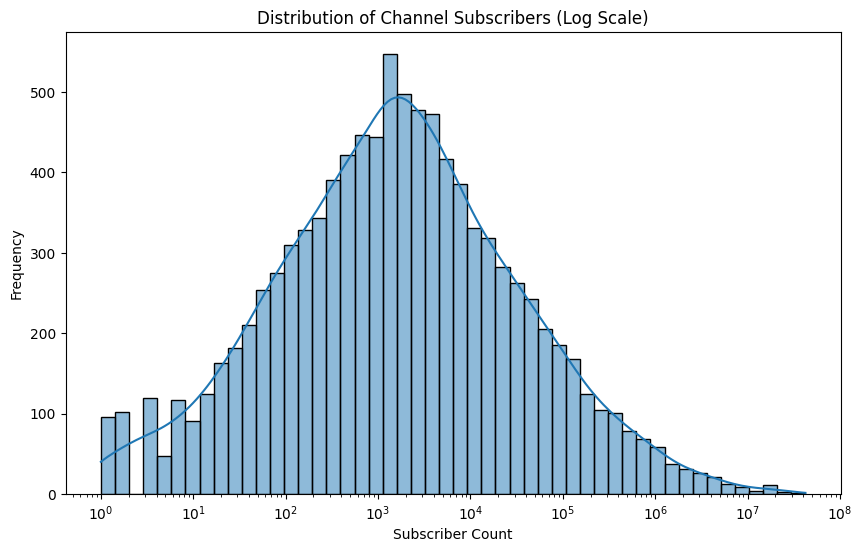

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of subscriber counts (log scale for better visibility)
plt.figure(figsize=(10, 6))
sns.histplot(video_channels_df['subscriber_count'], bins=50, kde=True, log_scale=True)
plt.title('Distribution of Channel Subscribers (Log Scale)')
plt.xlabel('Subscriber Count')
plt.ylabel('Frequency')
plt.show()

                              title  subscriber_count
9203                     TEDx Talks          42200000
8215                   Dhruv Rathee          26600000
8569                            TED          25600000
9122               Technical Guruji          23700000
8859                         TED-Ed          20800000
5723  A2 Motivation by Arvind Arora          20300000
8204                          Apple          19800000
8573                    StudyIQ IAS          18800000
6184                            IGN          18700000
8207                       ABC News          18000000


C:\Users\lingx\AppData\Local\Temp\ipykernel_13924\494672094.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




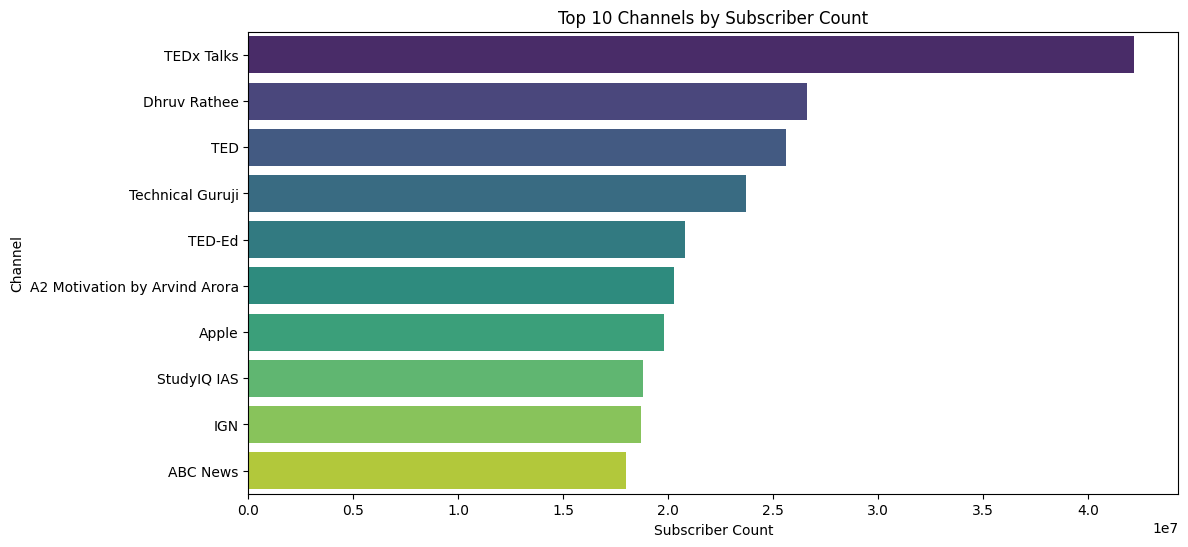

In [66]:
# Get the top 10 channels with the highest subscriber counts
top_channels = video_channels_df.nlargest(10, 'subscriber_count')

# Display the top 10 channels
print(top_channels[['title', 'subscriber_count']])

# Bar chart for top 10 channels by subscriber count
plt.figure(figsize=(12, 6))
sns.barplot(x=top_channels['subscriber_count'], y=top_channels['title'], palette="viridis")
plt.title('Top 10 Channels by Subscriber Count')
plt.xlabel('Subscriber Count')
plt.ylabel('Channel')
plt.show()

   country  subscriber_count
73      PH     452840.111111
59      MA     284397.631579
20      DE     272103.885246
91      TR     259447.756757
96      US     233530.294804
3       AT     201384.058824
44      IT     199971.774194
65      NG     192570.320000
92      TW     191165.000000
13      CA     182944.175824


C:\Users\lingx\AppData\Local\Temp\ipykernel_13924\2643317632.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




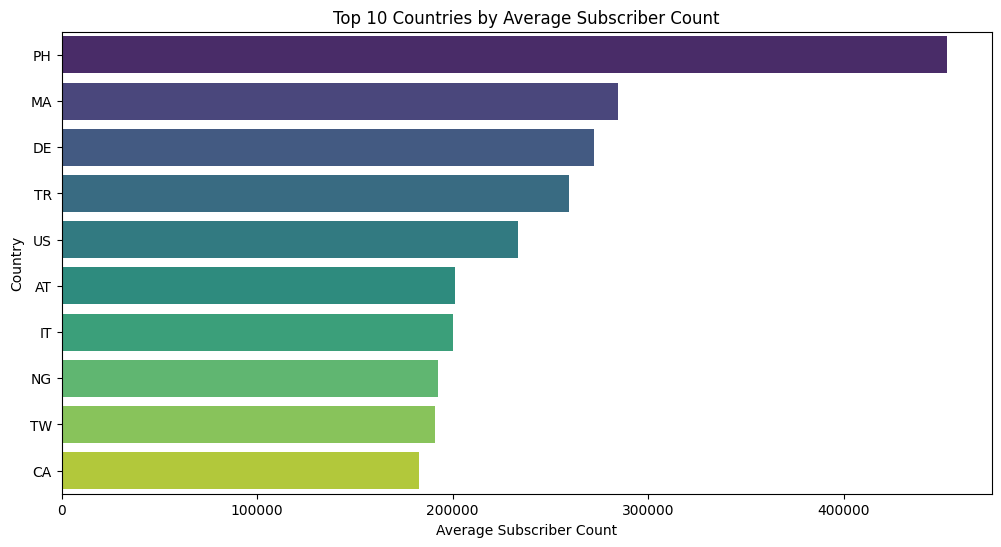

In [67]:
# Group by country and calculate the average subscriber count
country_subscribers = video_channels_df.groupby('country')['subscriber_count'].mean().reset_index()
country_subscribers = country_subscribers.sort_values(by='subscriber_count', ascending=False)

# Display the top 10 countries with the highest average subscribers
print(country_subscribers.head(10))

# Bar chart for average subscriber count by country (Top 10)
plt.figure(figsize=(12, 6))
top_countries = country_subscribers.head(10)
sns.barplot(x=top_countries['subscriber_count'], y=top_countries['country'], palette="viridis")
plt.title('Top 10 Countries by Average Subscriber Count')
plt.xlabel('Average Subscriber Count')
plt.ylabel('Country')
plt.show()

Correlation between subscribers and video count: 0.16064174796701675


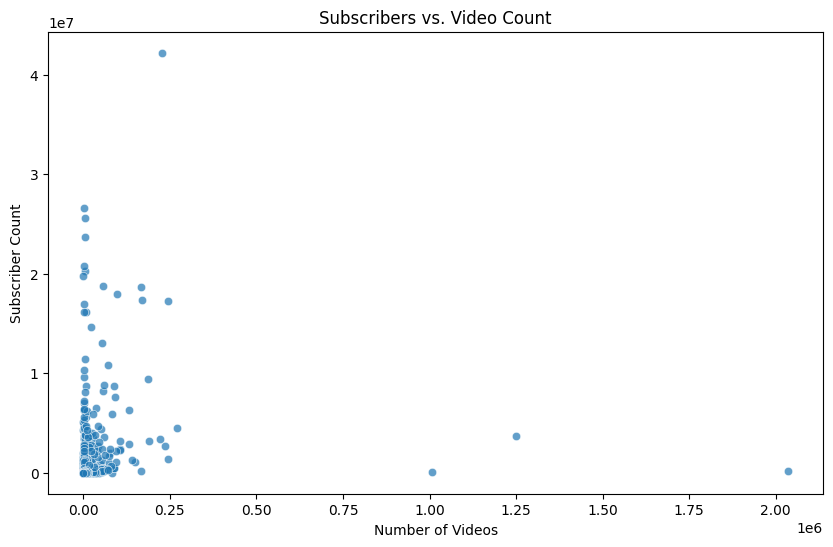

In [68]:
# Calculate correlation between subscriber_count and video_count
correlation = video_channels_df['subscriber_count'].corr(video_channels_df['video_count'])
print(f"Correlation between subscribers and video count: {correlation}")

# Scatter plot of subscribers vs. video count
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='video_count',
    y='subscriber_count',
    data=video_channels_df,
    alpha=0.7
)
plt.title('Subscribers vs. Video Count')
plt.xlabel('Number of Videos')
plt.ylabel('Subscriber Count')
plt.show()


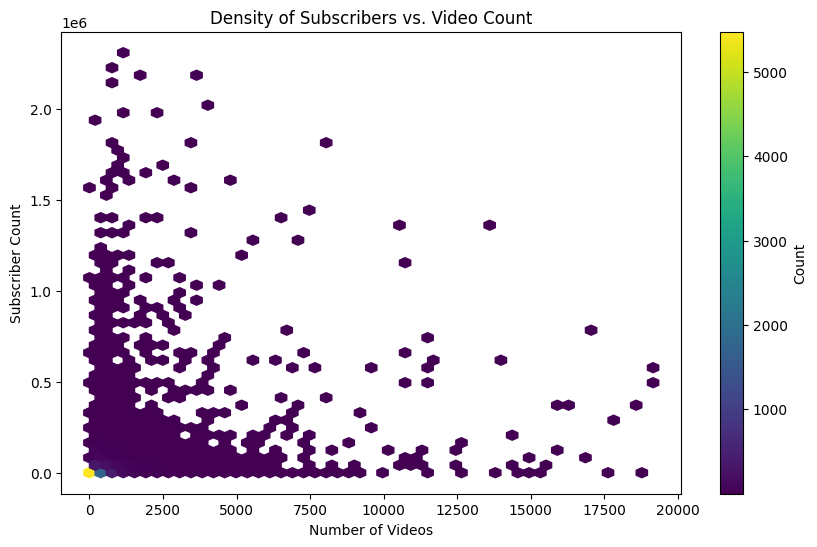

In [69]:
# Remove outliers based on 99th percentile
subscriber_threshold = video_channels_df['subscriber_count'].quantile(0.99)
video_threshold = video_channels_df['video_count'].quantile(0.99)

filtered_df = video_channels_df[
    (video_channels_df['subscriber_count'] <= subscriber_threshold) &
    (video_channels_df['video_count'] <= video_threshold)
]

# Hexbin plot for subscribers vs. video count
plt.figure(figsize=(10, 6))
plt.hexbin(
    x=filtered_df['video_count'],
    y=filtered_df['subscriber_count'],
    gridsize=50,
    cmap='viridis',
    mincnt=1
)
plt.colorbar(label='Count')
plt.title('Density of Subscribers vs. Video Count')
plt.xlabel('Number of Videos')
plt.ylabel('Subscriber Count')
plt.show()

In [70]:
import plotly.express as px

# Map ISO-2 to ISO-3 in the dataset
country_subscribers['iso_alpha_3'] = country_subscribers['country'].apply(convert_iso2_to_iso3)

# Create a choropleth map for average subscribers by country
fig = px.choropleth(
    country_subscribers,
    locations='iso_alpha_3',
    color='subscriber_count',
    hover_name='country',
    color_continuous_scale='Viridis',
    title='Average Subscriber Count by Country'
)
fig.show()

### Channel Video Count

### Channel Age

In [71]:
video_channels_df['published_at'] = pd.to_datetime(video_channels_df['published_at'], format='ISO8601')

In [72]:
print(video_channels_df[['title', 'published_at']].head())

                    title              published_at
0                   Soomo 2009-04-22 18:57:57+00:00
1          Curt Jaimungal 2018-06-03 15:30:08+00:00
2       Catherine Ziemann 2012-09-30 02:10:11+00:00
3  Diane R. Gehart, Ph.D. 2012-09-19 04:08:59+00:00
4       Dr. Trefor Bazett 2013-07-03 02:53:05+00:00


In [73]:
import pytz
from datetime import datetime

# Get the current date in UTC
current_date = datetime.now(pytz.utc)

# Calculate the age of the channel in years
video_channels_df['channel_age_years'] = (current_date - video_channels_df['published_at']).dt.days / 365

print(video_channels_df[['title', 'channel_age_years']].head())

                    title  channel_age_years
0                   Soomo          15.745205
1          Curt Jaimungal           6.624658
2       Catherine Ziemann          12.304110
3  Diane R. Gehart, Ph.D.          12.334247
4       Dr. Trefor Bazett          11.547945


In [74]:
print(video_channels_df['channel_age_years'].describe())

count    9950.000000
mean        8.100789
std         4.697672
min         0.068493
25%         4.402740
50%         7.567123
75%        11.886301
max        19.583562
Name: channel_age_years, dtype: float64


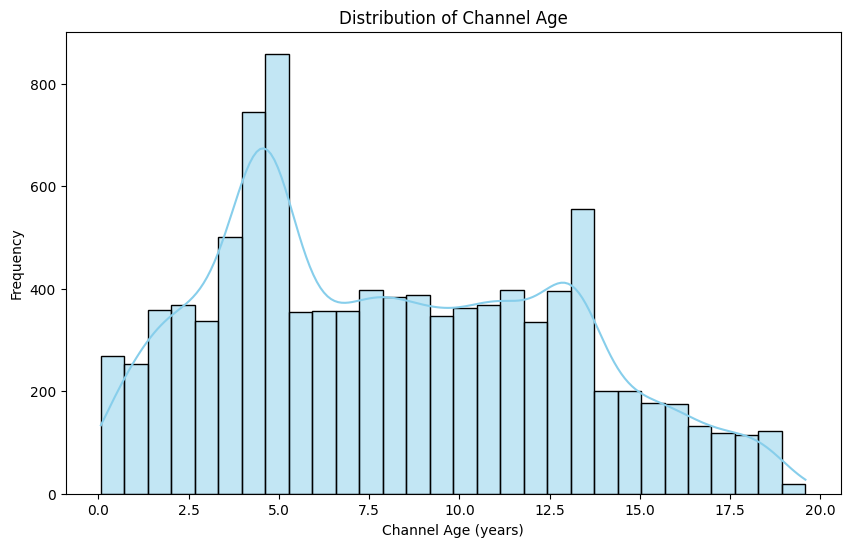

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of channel age
plt.figure(figsize=(10, 6))
sns.histplot(video_channels_df['channel_age_years'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Channel Age')
plt.xlabel('Channel Age (years)')
plt.ylabel('Frequency')
plt.show()


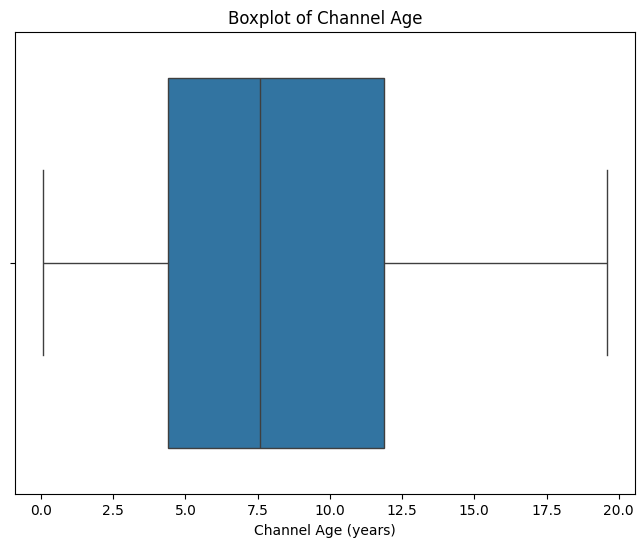

In [76]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=video_channels_df['channel_age_years'])
plt.title('Boxplot of Channel Age')
plt.xlabel('Channel Age (years)')
plt.show()

channel_age_category
Old (>10 years)             3594
Established (5-10 years)    2857
Moderate (2-5 years)        2639
New (<2 years)               860
Name: count, dtype: int64


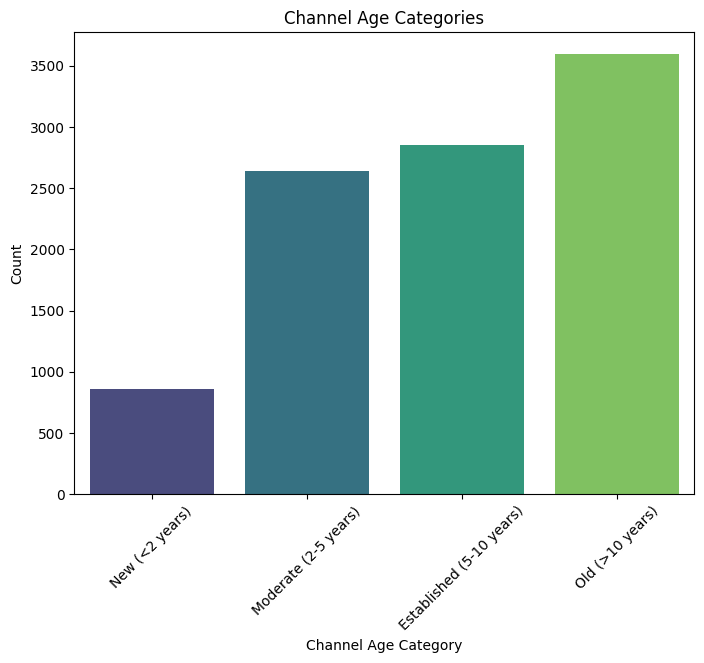

In [77]:
# Define bins and labels for channel age categories
bins = [0, 2, 5, 10, float('inf')]
labels = ['New (<2 years)', 'Moderate (2-5 years)', 'Established (5-10 years)', 'Old (>10 years)']

video_channels_df['channel_age_category'] = pd.cut(video_channels_df['channel_age_years'], bins=bins, labels=labels)

channel_age_category_counts = video_channels_df['channel_age_category'].value_counts()
print(channel_age_category_counts)

plt.figure(figsize=(8, 6))
sns.barplot(
    x=channel_age_category_counts.index, 
    y=channel_age_category_counts.values, 
    hue=channel_age_category_counts.index,
    palette='viridis')
plt.title('Channel Age Categories')
plt.xlabel('Channel Age Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


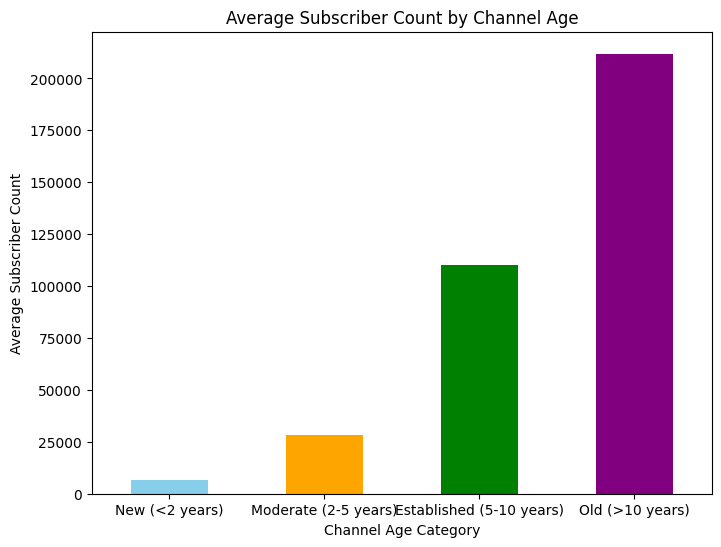

In [78]:
# Calculate the average view count for each channel age category
age_subscriber_stats = video_channels_df.groupby(by='channel_age_category', observed=False)['subscriber_count'].mean()

plt.figure(figsize=(8, 6))
age_subscriber_stats.plot(kind='bar', color=['skyblue', 'orange', 'green', 'purple'])
plt.title('Average Subscriber Count by Channel Age')
plt.xlabel('Channel Age Category')
plt.ylabel('Average Subscriber Count')
plt.xticks(rotation=0)
plt.show()

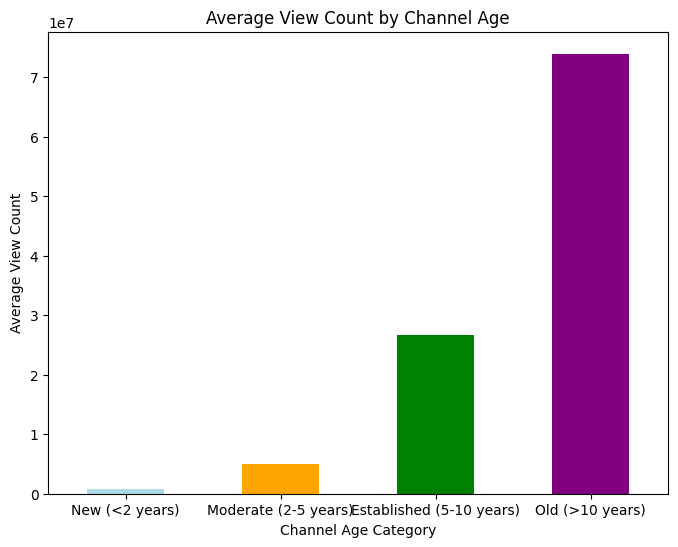

In [79]:
# Calculate the average view count for each channel age category
age_view_stats = video_channels_df.groupby(by='channel_age_category', observed=False)['view_count'].mean()

plt.figure(figsize=(8, 6))
age_view_stats.plot(kind='bar', color=['lightblue', 'orange', 'green', 'purple'])
plt.title('Average View Count by Channel Age')
plt.xlabel('Channel Age Category')
plt.ylabel('Average View Count')
plt.xticks(rotation=0)
plt.show()


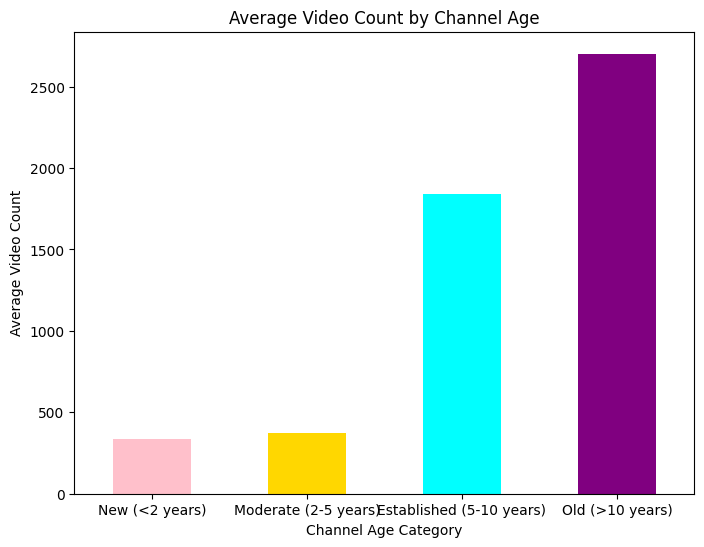

In [80]:
# calculate the average video count by channel age category
age_video_count_stats = video_channels_df.groupby(by='channel_age_category', observed=False)['video_count'].mean()

# plot the bar chart
plt.figure(figsize=(8, 6))
age_video_count_stats.plot(kind='bar', color=['pink', 'gold', 'cyan', 'purple'])
plt.title('Average Video Count by Channel Age')
plt.xlabel('Channel Age Category')
plt.ylabel('Average Video Count')
plt.xticks(rotation=0)
plt.show()

In [81]:
# Calculate the average view count for each channel age category
video_channels_df['avg_views_per_video'] = video_channels_df['view_count'] / video_channels_df['video_count']

print(video_channels_df[['title', 'channel_age_years', 'avg_views_per_video']].head())

                    title  channel_age_years  avg_views_per_video
0                   Soomo          15.745205        495273.863636
1          Curt Jaimungal           6.624658         45262.300254
2       Catherine Ziemann          12.304110         49796.333333
3  Diane R. Gehart, Ph.D.          12.334247         13880.963134
4       Dr. Trefor Bazett          11.547945         84820.020761


In [82]:
# define bins and labels for channel age categories
bins = [0, 2, 5, 10, float('inf')]
labels = ['New (<2 years)', 'Moderate (2-5 years)', 'Established (5-10 years)', 'Old (>10 years)']

video_channels_df['channel_age_category'] = pd.cut(video_channels_df['channel_age_years'], bins=bins, labels=labels)

print(video_channels_df[['channel_age_years', 'channel_age_category']].head())

   channel_age_years      channel_age_category
0          15.745205           Old (>10 years)
1           6.624658  Established (5-10 years)
2          12.304110           Old (>10 years)
3          12.334247           Old (>10 years)
4          11.547945           Old (>10 years)


In [83]:
# calculate the average view count per video for each channel age category
age_views_stats = video_channels_df.groupby('channel_age_category')['avg_views_per_video'].mean()

print(age_views_stats)

channel_age_category
New (<2 years)               2997.086724
Moderate (2-5 years)         9601.377042
Established (5-10 years)    15519.148838
Old (>10 years)             25491.915991
Name: avg_views_per_video, dtype: float64


C:\Users\lingx\AppData\Local\Temp\ipykernel_13924\2049524492.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



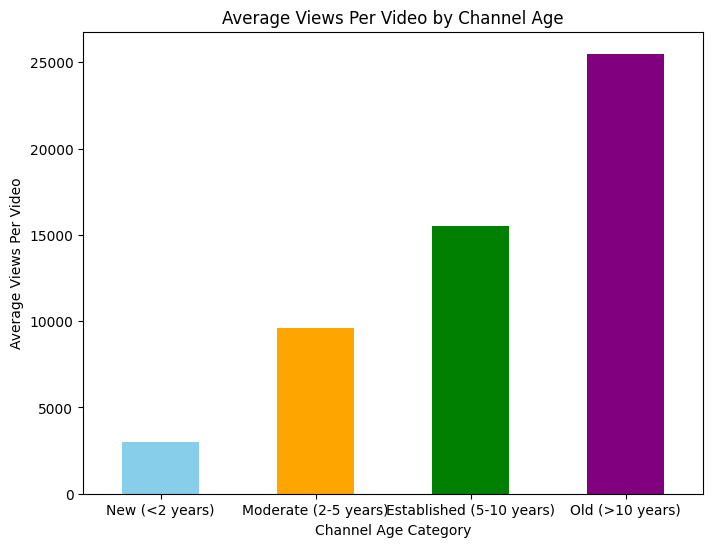

In [84]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
age_views_stats.plot(kind='bar', color=['skyblue', 'orange', 'green', 'purple'])
plt.title('Average Views Per Video by Channel Age')
plt.xlabel('Channel Age Category')
plt.ylabel('Average Views Per Video')
plt.xticks(rotation=0)
plt.show()


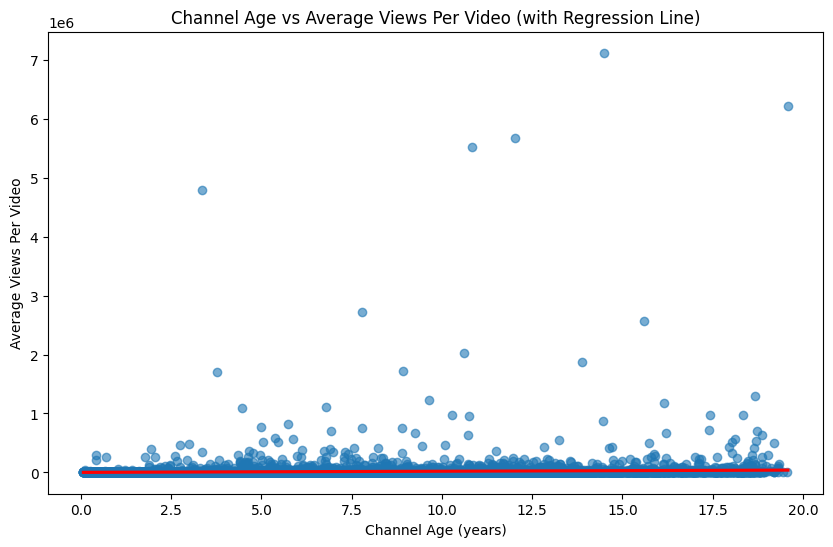

In [85]:
# plot the scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='channel_age_years', y='avg_views_per_video', data=video_channels_df, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Channel Age vs Average Views Per Video (with Regression Line)')
plt.xlabel('Channel Age (years)')
plt.ylabel('Average Views Per Video')
plt.show()


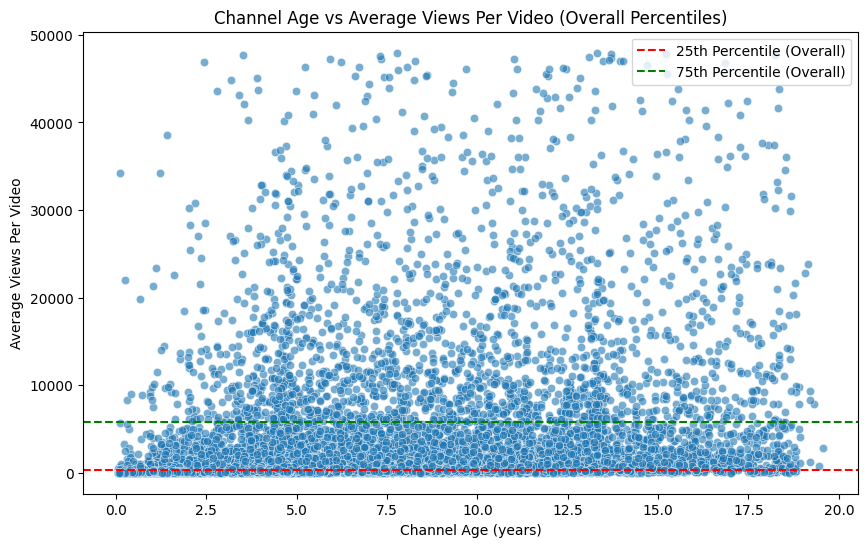

In [86]:
# Filter out outliers (channels with more than 30,000 views per video)
filtered_df = video_channels_df[video_channels_df['avg_views_per_video'].quantile(0.95) >= video_channels_df['avg_views_per_video']]

# Calculate the overall 25th and 75th percentiles
q25 = video_channels_df['avg_views_per_video'].quantile(0.25)
q75 = video_channels_df['avg_views_per_video'].quantile(0.75)

# Plot the scatter plot with percentiles
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='channel_age_years',
    y='avg_views_per_video',
    data=filtered_df, 
    alpha=0.6
)

# Add horizontal lines for the percentiles
plt.axhline(q25, color='red', linestyle='--', label='25th Percentile (Overall)')
plt.axhline(q75, color='green', linestyle='--', label='75th Percentile (Overall)')

plt.title('Channel Age vs Average Views Per Video (Overall Percentiles)')
plt.xlabel('Channel Age (years)')
plt.ylabel('Average Views Per Video')
plt.legend()
plt.show()

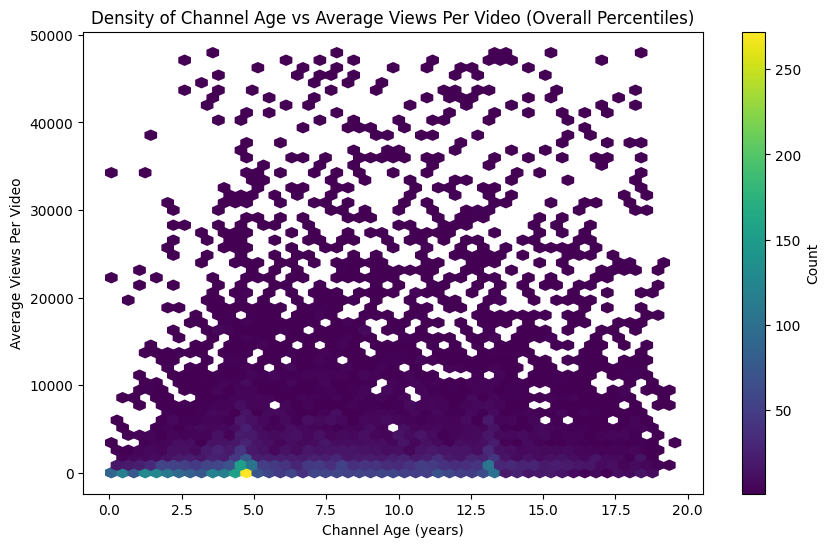

In [87]:
# Hexbin plot for subscribers vs. video count
plt.figure(figsize=(10, 6))
plt.hexbin(
    x=filtered_df['channel_age_years'],
    y=filtered_df['avg_views_per_video'],
    gridsize=50,
    cmap='viridis',
    mincnt=1
)
plt.colorbar(label='Count')
plt.title('Density of Channel Age vs Average Views Per Video (Overall Percentiles)')
plt.xlabel('Channel Age (years)')
plt.ylabel('Average Views Per Video')
plt.show()

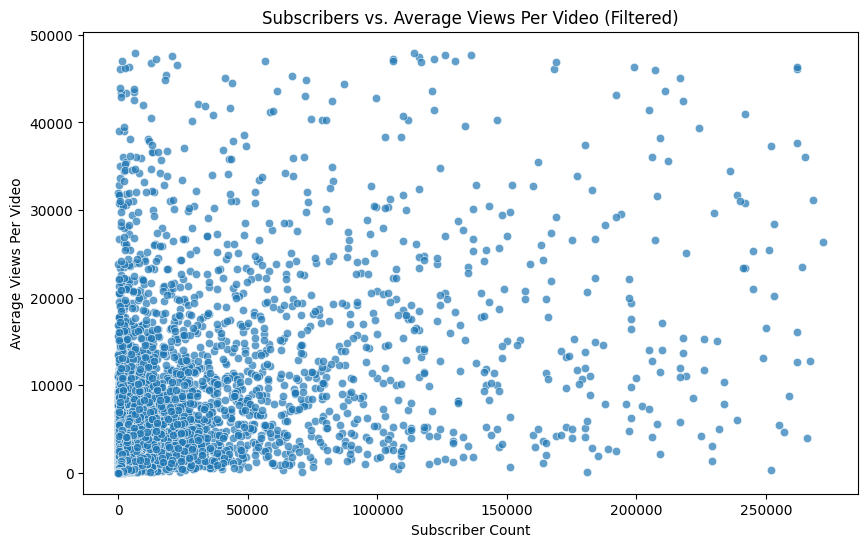

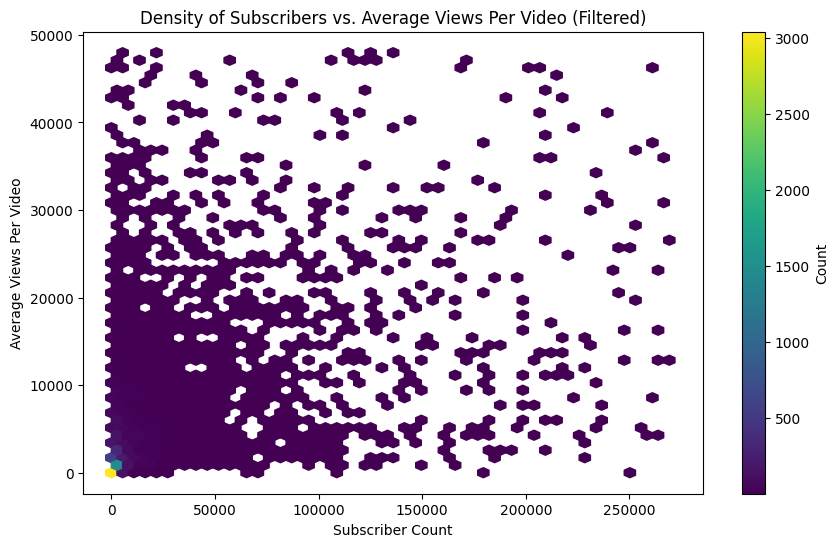

In [88]:
# Remove outliers based on the 99th percentile
subscriber_threshold = video_channels_df['subscriber_count'].quantile(0.95)
avg_views_threshold = video_channels_df['avg_views_per_video'].quantile(0.95)

filtered_df = video_channels_df[
    (video_channels_df['subscriber_count'] <= subscriber_threshold) &
    (video_channels_df['avg_views_per_video'] <= avg_views_threshold)
]

# Scatter plot after removing outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='subscriber_count',
    y='avg_views_per_video',
    data=filtered_df,
    alpha=0.7
)
plt.title('Subscribers vs. Average Views Per Video (Filtered)')
plt.xlabel('Subscriber Count')
plt.ylabel('Average Views Per Video')
plt.show()

# Hexbin plot for subscribers vs. video count
plt.figure(figsize=(10, 6))
plt.hexbin(
    x=filtered_df['subscriber_count'],
    y=filtered_df['avg_views_per_video'],
    gridsize=50,
    cmap='viridis',
    mincnt=1
)
plt.colorbar(label='Count')
plt.title('Density of Subscribers vs. Average Views Per Video (Filtered)')
plt.xlabel('Subscriber Count')
plt.ylabel('Average Views Per Video')
plt.show()
